<a href="https://colab.research.google.com/github/olesyamba/python_compilation/blob/main/teo_20_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Для проигрывания скрипта:

1.   Загрузить файл с шаблоном
2.   Скопировать путь
3.   Подставить его в переменную fname в 5 ячейке



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
pip install pycel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.1/114.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12=

In [9]:
pip install markdown

In [10]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00


In [11]:
fname = '/content/deprotected_shablon_CLEAN_RANGES.xlsx'

In [12]:
fname = '/content/drive/MyDrive/Colab Notebooks/deprotected_shablon_CLEAN_RANGES.xlsx'

# *Создание необходимых функций и загрузка файла с шаблоном*

In [127]:
# -*- coding: UTF-8 -*-
#
# Created by: Krasnukhina Olesya
# Updated at: 19/03/2024
# This file uses the Pycel Library, Licensed under GPLv3 (the 'License')
# You may not use this work except in compliance with the License.
# You may obtain a copy of the Licence at:
#   https://www.gnu.org/licenses/gpl-3.0.en.html

"""
Simple script showing how a spreadsheet cell can be translated to python
and write to documentation
"""
import logging
import os
import sys
import markdown
import re
import pycel
from pycel import ExcelCompiler
import openpyxl
from openpyxl.utils import get_column_letter
import copy

def pycel_logging_to_console(enable=True):
    if enable:
        logger = logging.getLogger('pycel')
        logger.setLevel('INFO')

        console = logging.StreamHandler(sys.stdout)
        console.setLevel(logging.INFO)
        logger.addHandler(console)

def pycel_logging_to_file(sheet_name,enable=True):
    if enable:
        logger = logging.getLogger('pycel')
        logger.setLevel('INFO')
        console = logging.FileHandler(f"/content/{sheet_name}.log", mode='w')

        # console = logging.StreamHandler(sys.stdout)
        # console.setLevel(logging.INFO)
        logger.addHandler(console)

def write_to_file(cell_name, sheet_name, compiled_code, table, dependent_tables, upd_name):
    filename=f'/content/{sheet_name}.txt'
    with open(filename, 'a+') as file:
        # Write sheet_name in H2 style
        file.write(f'### {sheet_name}\n\n')
        file.write(f'#### {old_cell_row} =\> {table}\n\n')

        # Write cell_name in H1 style
        file.write(f'{sheet_name_to_write}!{pycel.AddressCell(cell_name_to_write).column}{pycel.AddressCell(cell_name_to_write).row} =\>  {upd_name}\n\n')

        # Write compiled_code in code block style
        # compiled_code_markdown = markdown.markdown(compiled_code, extensions=['codehilite'])
        file.write(f'```\n{compiled_code}\n```')

        # Write table name
        file.write(f'\n\nТаблицы для хранения расчетного значения: *{{red}}({table})*\n\n')

        dep_tables_formatted = [f'* {value} ({key})\n' for key,value in dependent_tables.items()]
        # Write connected tables names
        file.write(f'Таблицы с исходными данными для расчета:\n\n{"".join(dep_tables_formatted)}\n\n')


# def remove_patterns(input_str):
#     # Define the patterns to be removed
#     patterns = [r'_R_\((\w+)\)', r'_C_\((\w+)\)', r'_REF_\((\w+)\)']
#     # Iterate through patterns and replace them with the captured 'some_text'
#     for pattern in patterns:
#         input_str = re.sub(pattern, r'\1', input_str)
#     return input_str


def remove_patterns(input_str):
    # Define a function for recursive replacement
    def replace(match):
        return match.group(1) if match.group(1) else match.group(2)
    # Define the patterns to be replaced
    patterns = [
        r'_R_\("([^"]*)"\)',
        r'_C_\("([^"]*)"\)',
        r'_REF_\("([^"]*)"\)'
    ]
    # Replace the patterns recursively
    for pattern in patterns:
        input_str = re.sub(pattern, replace, input_str)
    return input_str


def is_cell_in_explicit_range(workbook, sheet_name, cell_address, min_row, max_row, min_col, max_col):
    # # Load the workbook
    # workbook = openpyxl.load_workbook(workbook_path)

    # Select the sheet
    sheet = workbook[sheet_name]

    # Convert cell address to row and column indices
    cell_column, cell_row  = openpyxl.utils.cell.coordinate_from_string(cell_address)

    # Check if the cell is within the explicit range
    if min_row <= cell_row <= max_row and min_col <= openpyxl.utils.cell.column_index_from_string(cell_column) <= max_col:
        return True
    else:
        return False


def filter_defined_names_by_type_and_sheet(defined_names, sheet_name, defined_name_type = 'RANGE'):
    filtered_names = {}

    for name, value in defined_names.items():
        if value.type == defined_name_type and any(sheet == sheet_name for sheet, _ in value.destinations):
            filtered_names[name] = value

    return filtered_names

# функция, которая проверяет строки на вхождение
def filter_refs(string_to_check):
    if len(re.findall(r'\w+[!]*\w?\d+', string_to_check)) > 0: # len(re.findall(r'!', string_to_check)) > 0 or
        return True
    else:
        return False

# path = os.path.dirname(__file__)
# fname = os.path.join(path, "deprotected_shablon_CLEAN_RANGES.xlsx")

print(f"Loading {fname}...")

# load & compile the file to a graph
excel = ExcelCompiler(filename=fname)


Loading /content/drive/MyDrive/Colab Notebooks/deprotected_shablon_CLEAN_RANGES.xlsx...


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


# *Исследование и преобразования над ячейкой*

Примеры ячеек для тестирования:
Маркетинг

L11

H34

H9:H11

P27, J43

Нормативы_Маркетинг

C9

E8

In [128]:

cell_or_range = input('Необходимо исследовать одну ячейку (1) или несколько (2)? (1/2)  ')

if cell_or_range == '1':
    cell_name = input('Введите наименование ячейки (Пример | С9):  ')
    cell_name_to_write = cell_name
    sheet_name = input('Введите наименование листа (Пример | Маркетинг): ')
    sheet_name_to_write = sheet_name

    pycel_logging_to_file(sheet_name)

    print("Идентификация ячейки завершена: {}".format(f'{sheet_name}!{cell_name}...'))

    print("\nРасчет цепочки вычислений для исследуемой ячейки завершен.\n{} = {}".format(cell_name, excel.evaluate(f'{sheet_name}!{cell_name}')))

    if excel.cell_map[f'{sheet_name}!{cell_name}'].formula != None: # ячейка содержит формулу, требуется расшифровка:
        print('\nГенерирую методологию расчетов для ячейки... Ячейка содержит формулу, требуется расшифровка.')

        print("\n {}".format(excel.cell_map[f'{sheet_name}!{cell_name}']))

        print("\nВычисляю, в какой диапазон попадает исследуемая ячейка...")
        workbook = excel.excel.workbook

        filtered_defined_names = filter_defined_names_by_type_and_sheet(workbook.defined_names, sheet_name)

        main_done = False
        a = 0
        for name, value in filtered_defined_names.items():
            if main_done == False:
                ranges = workbook.defined_names[name].value  # 'АА_методология!$A$13:$DR$53'
                ranges_splited = ranges.split(',')
                for range in ranges_splited:
                    min_col, min_row, max_col, max_row = openpyxl.utils.cell.range_boundaries(range.split('!')[1])
                    result = is_cell_in_explicit_range(workbook, sheet_name, cell_name, min_row, max_row, min_col, max_col)
                    if result:
                        print(f"Ячейка {cell_name} находится в диапазоне: {range}.")
                        print(f'\nПредполагаемая таблица для хранения: {name}')
                        table = name
                        main_done = True
                    if len(ranges_splited) > 1:
                        for range_temp in ranges_splited:
                            if a == 0:
                                min_col_temp, min_row_temp, max_col_temp, max_row_temp = openpyxl.utils.cell.range_boundaries(range_temp.split('!')[1])
                            else:
                                min_col_tempp, min_row_tempp, max_col_tempp, max_row_tempp = openpyxl.utils.cell.range_boundaries(
                                    range_temp.split('!')[1])
                                if min_col_tempp < min_col_temp:
                                    min_col_temp = min_col_tempp
                            a += 1
                        start_range_column = openpyxl.utils.cell.get_column_letter(min_col_temp)
                    else:
                        # start_range_column_i = pycel.AddressRange(range.split('!')[1]).start.column
                        start_range_column = pycel.AddressRange(ranges.split(',')[0].split('!')[1]).start.column
                    if result:
                        break

        old_cell_column = pycel.AddressCell(cell_name).column
        old_cell_row = pycel.AddressCell(cell_name).row
        cell_name_new = name

        # ВСТАВИТЬ ПЕРЕПРИСВОЕНИЕ для строк
        # Для переприсвоения строки на продукт необходимо вытащить по name именованный диапазон
        # У него найти первый столбец
        # start_range_column = pycel.AddressRange(workbook.defined_names[name].value).start.column
        # И из него вытащить элемент по old_cell_row и подставить вместо old_cell_row
        old_cell_row = excel.evaluate(f'{sheet_name}!{start_range_column}{old_cell_row}')
        excel.evaluate(f'{sheet_name}!{old_cell_column}{pycel.AddressCell(cell_name).row}')

        print(f'\nПереприсвоенная ячейка: {table}[{old_cell_row}][{old_cell_column}]')
        upd_name = f'{table}[{old_cell_row}][{old_cell_column}]'

        print("\nФормула: {}".format(
        excel.cell_map[f'{sheet_name}!{cell_name}'].formula))

        # print("Формула: {}".format(
        # excel.cell_map[f'{sheet_name}!{cell_name}'].formula.base_formula))

        print("\nPython code: {}".format(excel.cell_map[f'{sheet_name}!{cell_name}'].formula.python_code))

        formula = excel.cell_map[f'{sheet_name}!{cell_name}'].formula.python_code

        # cell_references = list(excel.cell_map[f'{sheet_name}!{cell_name}'].needed_addresses)
        cell_references = [i.address for i in list(excel.cell_map[f'{sheet_name}!{cell_name}'].needed_addresses)]

        # cell_references = [i.replace('"', '') for i in re.findall(r'".*?"', formula)]
        # cell_references = list(filter(filter_refs, cell_references))
        print("\n\nЯчейки, которые используются в формуле: {}".format(cell_references))
        dependent_tables = {}
        for i in cell_references:
            if i.__contains__(':'): # диапазон ячеек
                range_list = [i[0].address for i in list(pycel.AddressRange(i).resolve_range)] # [i.address for i in [i[0] for i in list(excel.cell_map[i].needed_addresses[cell_references.index(i)].resolve_range[0])]]
                print("\nДиапазон ячеек, использующийся в формуле состоит из: \n{}".format(f'{range_list}'.replace(',', ',\n')))
                range_name = i

                replace_cell_name_list = []

                for i in range_list:
                    done = False
                    sheet_name = pycel.AddressCell(i).sheet
                    cell_name = pycel.AddressCell(i).coordinate

                    filtered_defined_names = filter_defined_names_by_type_and_sheet(workbook.defined_names, sheet_name)

                    a = 0
                    for name, value in filtered_defined_names.items():
                        if done == False:
                            ranges = workbook.defined_names[name].value  # 'АА_методология!$A$13:$DR$53'
                            ranges_splited = ranges.split(',')
                            for range in ranges_splited:
                                min_col, min_row, max_col, max_row = openpyxl.utils.cell.range_boundaries(range.split('!')[1])
                                result = is_cell_in_explicit_range(workbook, sheet_name, cell_name, min_row, max_row, min_col,
                                                                    max_col)
                                if result:
                                    print(f"\nЯчейка {sheet_name}!{cell_name} находится в диапазоне: {range}.")
                                    print(f'Таблица: {name}')
                                    done = True
                            if len(ranges_splited) > 1:
                                for range_temp in ranges_splited:
                                    if a == 0:
                                        min_col_temp, min_row_temp, max_col_temp, max_row_temp = openpyxl.utils.cell.range_boundaries(range_temp.split('!')[1])
                                    else:
                                        min_col_tempp, min_row_tempp, max_col_tempp, max_row_tempp = openpyxl.utils.cell.range_boundaries(
                                            range_temp.split('!')[1])
                                        if min_col_tempp < min_col_temp:
                                            min_col_temp = min_col_tempp
                                    a += 1
                                start_range_column_i = openpyxl.utils.cell.get_column_letter(min_col_temp)
                            else:
                                # start_range_column_i = pycel.AddressRange(range.split('!')[1]).start.column
                                start_range_column_i = pycel.AddressRange(ranges.split(',')[0].split('!')[1]).start.column
                            if result:
                                break


                    dependent_tables[i] = f'{name}'
                    cell_name_new_i = f'{name}'
                    old_cell_column_i = pycel.AddressCell(cell_name).column
                    old_cell_row_i = pycel.AddressCell(cell_name).row

                    old_cell_row_i = excel.evaluate(f'{sheet_name}!{start_range_column_i}{old_cell_row_i}')


                    replace_cell_name = f'{cell_name_new_i}[{old_cell_row_i}][{old_cell_column_i}]'
                    replace_cell_name_list.append(replace_cell_name)

                excel.evaluate(f'{sheet_name_to_write}!{pycel.AddressCell(cell_name_to_write).column}{pycel.AddressCell(cell_name_to_write).row}')
                formula = re.sub(range_name, f'{replace_cell_name_list}', formula)


            else: # конкретная ячейка

                sheet_name = pycel.AddressCell(i).sheet
                cell_name = pycel.AddressCell(i).coordinate

                filtered_defined_names = filter_defined_names_by_type_and_sheet(workbook.defined_names, sheet_name)

                done = False

                a = 0
                for name, value in filtered_defined_names.items():
                    if done == False:
                        ranges = workbook.defined_names[name].value  # 'АА_методология!$A$13:$DR$53'
                        ranges_splited = ranges.split(',')
                        for range in ranges_splited:
                            min_col, min_row, max_col, max_row = openpyxl.utils.cell.range_boundaries(range.split('!')[1])
                            result = is_cell_in_explicit_range(workbook, sheet_name, cell_name, min_row, max_row, min_col,
                                                                max_col)
                            if result:
                                print(f"\nЯчейка {sheet_name}!{cell_name} находится в диапазоне: {range}.")
                                print(f'Таблица: {name}')
                                done = True
                                dependent_tables[i] = f'{name}'
                                cell_name_new_i = f'{name}'
                        if len(ranges_splited) > 1:
                            for range_temp in ranges_splited:
                                if a == 0:
                                    min_col_temp, min_row_temp, max_col_temp, max_row_temp = openpyxl.utils.cell.range_boundaries(range_temp.split('!')[1])
                                else:
                                    min_col_tempp, min_row_tempp, max_col_tempp, max_row_tempp = openpyxl.utils.cell.range_boundaries(
                                        range_temp.split('!')[1])
                                    if min_col_tempp < min_col_temp:
                                        min_col_temp = min_col_tempp
                                a += 1
                            start_range_column_i = openpyxl.utils.cell.get_column_letter(min_col_temp)
                        else:
                            # start_range_column_i = pycel.AddressRange(range.split('!')[1]).start.column
                            start_range_column_i = pycel.AddressRange(ranges.split(',')[0].split('!')[1]).start.column
                        if result:
                            break

                old_cell_column_i = pycel.AddressCell(cell_name).column
                old_cell_row_i = pycel.AddressCell(cell_name).row

                old_cell_row_i = excel.evaluate(f'{sheet_name}!{start_range_column_i}{old_cell_row_i}')
                excel.evaluate(f'{sheet_name_to_write}!{pycel.AddressCell(cell_name_to_write).column}{pycel.AddressCell(cell_name_to_write).row}')

                replace_cell_name = f'{cell_name_new_i}[{old_cell_row_i}][{old_cell_column_i}]'

                formula = re.sub(rf'{sheet_name}!{cell_name}', replace_cell_name, formula)

        print("\nРедуцирую локальные функции pycel из формулы...")
        compiled_code = remove_patterns(formula)
        print("\nПереприсваиваю имена ячеек в формуле...")

        print(f"\n\nPython code | UPD version:\n {compiled_code}\n\n---------------------------------------------------------------------------------------------------------------------------------")
    else:
        print('\nГенерирую методологию расчетов для ячейки...')

        print("\n\nЯчейка является константой {}".format(excel.cell_map[f'{sheet_name}!{cell_name}']))

        need_rename = input('Все равно выполнить переприсвоение? (д/н)')
        if need_rename == 'д' :
            print("\nВычисляю, в какой диапазон попадает исследуемая ячейка...")
            workbook = excel.excel.workbook

            filtered_defined_names = filter_defined_names_by_type_and_sheet(workbook.defined_names, sheet_name)

            main_done = False
            a = 0
            for name, value in filtered_defined_names.items():
                if main_done == False:
                    ranges = workbook.defined_names[name].value  # 'АА_методология!$A$13:$DR$53'
                    ranges_splited = ranges.split(',')
                    for range in ranges_splited:
                        min_col, min_row, max_col, max_row = openpyxl.utils.cell.range_boundaries(range.split('!')[1])
                        result = is_cell_in_explicit_range(workbook, sheet_name, cell_name, min_row, max_row, min_col, max_col)
                        if result:
                            print(f"Ячейка {cell_name} находится в диапазоне: {range}.")
                            print(f'\nПредполагаемая таблица для хранения: {name}')
                            table = name
                            main_done = True
                        if len(ranges_splited) > 1:
                            for range_temp in ranges_splited:
                                if a == 0:
                                    min_col_temp, min_row_temp, max_col_temp, max_row_temp = openpyxl.utils.cell.range_boundaries(range_temp.split('!')[1])
                                else:
                                    min_col_tempp, min_row_tempp, max_col_tempp, max_row_tempp = openpyxl.utils.cell.range_boundaries(
                                        range_temp.split('!')[1])
                                    if min_col_tempp < min_col_temp:
                                        min_col_temp = min_col_tempp
                                a += 1
                            start_range_column = openpyxl.utils.cell.get_column_letter(min_col_temp)
                        else:
                            # start_range_column_i = pycel.AddressRange(range.split('!')[1]).start.column
                            start_range_column = pycel.AddressRange(ranges.split(',')[0].split('!')[1]).start.column
                        if result:
                            break

            old_cell_column = pycel.AddressCell(cell_name).column
            old_cell_row = pycel.AddressCell(cell_name).row
            cell_name_new = name

            # ВСТАВИТЬ ПЕРЕПРИСВОЕНИЕ для строк
            # Для переприсвоения строки на продукт необходимо вытащить по name именованный диапазон
            # У него найти первый столбец
            # start_range_column = pycel.AddressRange(workbook.defined_names[name].value).start.column
            # И из него вытащить элемент по old_cell_row и подставить вместо old_cell_row
            old_cell_row = excel.evaluate(f'{sheet_name}!{start_range_column}{old_cell_row}')
            excel.evaluate(f'{sheet_name}!{old_cell_column}{pycel.AddressCell(cell_name).row}')

            print(f'\nПереприсвоенная ячейка: {table}[{old_cell_row}][{old_cell_column}]')
            upd_name = f'{table}[{old_cell_row}][{old_cell_column}]'

            #

Необходимо исследовать одну ячейку (1) или несколько (2)? (1/2)  1
Введите наименование ячейки (Пример | С9):  H9
Введите наименование листа (Пример | Маркетинг): Маркетинг
Идентификация ячейки завершена: Маркетинг!H9...
Range Адресная программа!G3:G200 evaluated to '((None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (N

INFO:pycel:Range Адресная программа!G3:G200 evaluated to '((None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None

Range Адресная программа!I3:I200 evaluated to '((None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,)

INFO:pycel:Range Адресная программа!I3:I200 evaluated to '((None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None

Range АА_методология!C16:C52 evaluated to '((0,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,))'


INFO:pycel:Range АА_методология!C16:C52 evaluated to '((0,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,))'


Range Отток B2C!N89:N129 evaluated to '((0.18146083821756887,), (0.18026215826384076,), (0.13239639076485002,), (0.18988554726223972,), (0.1597645860371902,), (0.1671116332395781,), (0.16953377242828702,), (0.1613345695131861,), (0.101,), (0.10031221811305784,), (0.14670228227814255,), (0.18537208829602672,), (0.16345221816153818,), (0.17925280390811446,), (0.15177161119140076,), (0.14446477274936645,), (0.1310994808916781,), (0.14762500731269518,), (0.13713799805871274,), (0.16994993448773388,), (0.15222934290207685,), (0.15442461624405174,), (0.181649282856333,), (0.18013859011904004,), (0.12009304919722998,), (0.16756869745479933,), (0.16732267407309134,), (0.18516528911350905,), (0.12024739256076994,), (0.1594948310251,), (0.16456157332249763,), (0.14823217941154715,), (0.17950129555025163,), (0.19176231570105834,), (0.15097494069710946,), (0.18742748729444772,), (0.1737911340551146,), (0.18018107493705363,), (0.14832420194299897,), (0.11474730822113086,), (0.1985,))'


INFO:pycel:Range Отток B2C!N89:N129 evaluated to '((0.18146083821756887,), (0.18026215826384076,), (0.13239639076485002,), (0.18988554726223972,), (0.1597645860371902,), (0.1671116332395781,), (0.16953377242828702,), (0.1613345695131861,), (0.101,), (0.10031221811305784,), (0.14670228227814255,), (0.18537208829602672,), (0.16345221816153818,), (0.17925280390811446,), (0.15177161119140076,), (0.14446477274936645,), (0.1310994808916781,), (0.14762500731269518,), (0.13713799805871274,), (0.16994993448773388,), (0.15222934290207685,), (0.15442461624405174,), (0.181649282856333,), (0.18013859011904004,), (0.12009304919722998,), (0.16756869745479933,), (0.16732267407309134,), (0.18516528911350905,), (0.12024739256076994,), (0.1594948310251,), (0.16456157332249763,), (0.14823217941154715,), (0.17950129555025163,), (0.19176231570105834,), (0.15097494069710946,), (0.18742748729444772,), (0.1737911340551146,), (0.18018107493705363,), (0.14832420194299897,), (0.11474730822113086,), (0.1985,))'


Range Отток B2C!N347:N387 evaluated to '((0.08000000000000002,), (0.08000000000000002,), (0.08,), (0.08000000000000002,), (0.08000000000000002,), (0.08,), (0.08,), (0.08,), (0.08,), (0.08,), (0.08000000000000002,), (0.08,), (0.07999999999999999,), (0.07999999999999999,), (0.08,), (0.08000000000000002,), (0.08,), (0.08,), (0.08000000000000002,), (0.08000000000000002,), (0.08,), (0.08,), (0.07999999999999999,), (0.08,), (0.08,), (0.08,), (0.08000000000000002,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,))'


INFO:pycel:Range Отток B2C!N347:N387 evaluated to '((0.08000000000000002,), (0.08000000000000002,), (0.08,), (0.08000000000000002,), (0.08000000000000002,), (0.08,), (0.08,), (0.08,), (0.08,), (0.08,), (0.08000000000000002,), (0.08,), (0.07999999999999999,), (0.07999999999999999,), (0.08,), (0.08000000000000002,), (0.08,), (0.08,), (0.08000000000000002,), (0.08000000000000002,), (0.08,), (0.08,), (0.07999999999999999,), (0.08,), (0.08,), (0.08,), (0.08000000000000002,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,), (0.08000000000000003,))'


Range Отток B2C!B347:M347 evaluated to '((0.0057171414292853575, 0.007556221889055473, 0.006036981509245377, 0.0063968015992004, 0.00895552223888056, 0.011554222888555723, 0.01211394302848576, 0.00495752123938031, 0.0007596201899050475, 0.004757621189405298, 0.006196901549225388, 0.004997501249375313),)'


INFO:pycel:Range Отток B2C!B347:M347 evaluated to '((0.0057171414292853575, 0.007556221889055473, 0.006036981509245377, 0.0063968015992004, 0.00895552223888056, 0.011554222888555723, 0.01211394302848576, 0.00495752123938031, 0.0007596201899050475, 0.004757621189405298, 0.006196901549225388, 0.004997501249375313),)'


Range Отток B2C!B348:M348 evaluated to '((0.0076241252915694785, 0.007704098633788739, 0.007464178607130957, 0.007490836387870709, 0.007970676441186273, 0.009196934355214929, 0.010689770076641118, 0.0038653782072642453, 0.0017594135288237257, 0.0038653782072642453, 0.0062379206931023005, 0.006131289570143286),)'


INFO:pycel:Range Отток B2C!B348:M348 evaluated to '((0.0076241252915694785, 0.007704098633788739, 0.007464178607130957, 0.007490836387870709, 0.007970676441186273, 0.009196934355214929, 0.010689770076641118, 0.0038653782072642453, 0.0017594135288237257, 0.0038653782072642453, 0.0062379206931023005, 0.006131289570143286),)'


Range Отток B2C!B349:M349 evaluated to '((0.00648, 0.008, 0.00624, 0.00664, 0.00792, 0.01168, 0.012, 0.00472, 0.00096, 0.00544, 0.00504, 0.00488),)'


INFO:pycel:Range Отток B2C!B349:M349 evaluated to '((0.00648, 0.008, 0.00624, 0.00664, 0.00792, 0.01168, 0.012, 0.00472, 0.00096, 0.00544, 0.00504, 0.00488),)'


Range Отток B2C!B350:M350 evaluated to '((0.006320000000000001, 0.006280000000000001, 0.006440000000000001, 0.007760000000000001, 0.007920000000000002, 0.008880000000000002, 0.010760000000000004, 0.005360000000000002, 0.0030400000000000006, 0.0048400000000000006, 0.006240000000000002, 0.006160000000000001),)'


INFO:pycel:Range Отток B2C!B350:M350 evaluated to '((0.006320000000000001, 0.006280000000000001, 0.006440000000000001, 0.007760000000000001, 0.007920000000000002, 0.008880000000000002, 0.010760000000000004, 0.005360000000000002, 0.0030400000000000006, 0.0048400000000000006, 0.006240000000000002, 0.006160000000000001),)'


Range Отток B2C!B351:M351 evaluated to '((0.0064064064064064076, 0.006886886886886887, 0.006966966966966968, 0.007447447447447448, 0.007687687687687689, 0.00800800800800801, 0.00872872872872873, 0.006326326326326327, 0.0052852852852852865, 0.0052852852852852865, 0.005605605605605606, 0.005365365365365367),)'


INFO:pycel:Range Отток B2C!B351:M351 evaluated to '((0.0064064064064064076, 0.006886886886886887, 0.006966966966966968, 0.007447447447447448, 0.007687687687687689, 0.00800800800800801, 0.00872872872872873, 0.006326326326326327, 0.0052852852852852865, 0.0052852852852852865, 0.005605605605605606, 0.005365365365365367),)'


Range Отток B2C!B352:M352 evaluated to '((0.007272727272727273, 0.007632367632367632, 0.007072927072927074, 0.007712287712287713, 0.007072927072927074, 0.007872127872127873, 0.00927072927072927, 0.005034965034965036, 0.004035964035964037, 0.006513486513486514, 0.004955044955044955, 0.0055544455544455544),)'


INFO:pycel:Range Отток B2C!B352:M352 evaluated to '((0.007272727272727273, 0.007632367632367632, 0.007072927072927074, 0.007712287712287713, 0.007072927072927074, 0.007872127872127873, 0.00927072927072927, 0.005034965034965036, 0.004035964035964037, 0.006513486513486514, 0.004955044955044955, 0.0055544455544455544),)'


Range Отток B2C!B353:M353 evaluated to '((0.0064735264735264735, 0.008311688311688312, 0.008231768231768233, 0.007272727272727273, 0.007592407592407593, 0.007272727272727273, 0.007992007992007992, 0.0054345654345654346, 0.0043956043956043965, 0.006073926073926075, 0.005594405594405595, 0.0053546453546453555),)'


INFO:pycel:Range Отток B2C!B353:M353 evaluated to '((0.0064735264735264735, 0.008311688311688312, 0.008231768231768233, 0.007272727272727273, 0.007592407592407593, 0.007272727272727273, 0.007992007992007992, 0.0054345654345654346, 0.0043956043956043965, 0.006073926073926075, 0.005594405594405595, 0.0053546453546453555),)'


Range Отток B2C!B354:M354 evaluated to '((0.006796601699150424, 0.006956521739130435, 0.007076461769115443, 0.006956521739130435, 0.00783608195902049, 0.009595202398800599, 0.009995002498750625, 0.006636681659170415, 0.002518740629685158, 0.004877561219390304, 0.004997501249375313, 0.005757121439280361),)'


INFO:pycel:Range Отток B2C!B354:M354 evaluated to '((0.006796601699150424, 0.006956521739130435, 0.007076461769115443, 0.006956521739130435, 0.00783608195902049, 0.009595202398800599, 0.009995002498750625, 0.006636681659170415, 0.002518740629685158, 0.004877561219390304, 0.004997501249375313, 0.005757121439280361),)'


Range Отток B2C!B355:M355 evaluated to '((0.0072, 0.008, 0.008, 0.00684, 0.00716, 0.00804, 0.00988, 0.00556, 0.00268, 0.00492, 0.005720000000000001, 0.006),)'


INFO:pycel:Range Отток B2C!B355:M355 evaluated to '((0.0072, 0.008, 0.008, 0.00684, 0.00716, 0.00804, 0.00988, 0.00556, 0.00268, 0.00492, 0.005720000000000001, 0.006),)'


Range Отток B2C!B356:M356 evaluated to '((0.00847152847152847, 0.004875124875124874, 0.007072927072927072, 0.007312687312687312, 0.006353646353646353, 0.010269730269730269, 0.012147852147852148, 0.006353646353646353, 0.001678321678321678, 0.004755244755244754, 0.0056743256743256735, 0.005034965034965034),)'


INFO:pycel:Range Отток B2C!B356:M356 evaluated to '((0.00847152847152847, 0.004875124875124874, 0.007072927072927072, 0.007312687312687312, 0.006353646353646353, 0.010269730269730269, 0.012147852147852148, 0.006353646353646353, 0.001678321678321678, 0.004755244755244754, 0.0056743256743256735, 0.005034965034965034),)'


Range Отток B2C!B357:M357 evaluated to '((0.006123061530765384, 0.006763381690845424, 0.006083041520760382, 0.006763381690845424, 0.007643821910955479, 0.009924962481240621, 0.010405202601300652, 0.005242621310655329, 0.0025612806403201606, 0.006083041520760382, 0.006563281640820411, 0.005842921460730366),)'


INFO:pycel:Range Отток B2C!B357:M357 evaluated to '((0.006123061530765384, 0.006763381690845424, 0.006083041520760382, 0.006763381690845424, 0.007643821910955479, 0.009924962481240621, 0.010405202601300652, 0.005242621310655329, 0.0025612806403201606, 0.006083041520760382, 0.006563281640820411, 0.005842921460730366),)'


Range Отток B2C!B358:M358 evaluated to '((0.00664, 0.00752, 0.00772, 0.00736, 0.00784, 0.00736, 0.00784, 0.0054, 0.003, 0.00396, 0.00776, 0.0076),)'


INFO:pycel:Range Отток B2C!B358:M358 evaluated to '((0.00664, 0.00752, 0.00772, 0.00736, 0.00784, 0.00736, 0.00784, 0.0054, 0.003, 0.00396, 0.00776, 0.0076),)'


Range Отток B2C!B359:M359 evaluated to '((0.0076361819090454775, 0.00655672163918041, 0.0063568215892053975, 0.006116941529235383, 0.006276861569215393, 0.007436281859070465, 0.010074962518740632, 0.0057971014492753615, 0.0020789605197401298, 0.007076461769115443, 0.00783608195902049, 0.006756621689155424),)'


INFO:pycel:Range Отток B2C!B359:M359 evaluated to '((0.0076361819090454775, 0.00655672163918041, 0.0063568215892053975, 0.006116941529235383, 0.006276861569215393, 0.007436281859070465, 0.010074962518740632, 0.0057971014492753615, 0.0020789605197401298, 0.007076461769115443, 0.00783608195902049, 0.006756621689155424),)'


Range Отток B2C!B360:M360 evaluated to '((0.0066433216608304145, 0.007123561780890445, 0.006923461730865432, 0.0066433216608304145, 0.008404202101050525, 0.009444722361180592, 0.011685842921460729, 0.005402701350675338, 0.0014007003501750877, 0.00464232116058029, 0.0058429214607303645, 0.0058429214607303645),)'


INFO:pycel:Range Отток B2C!B360:M360 evaluated to '((0.0066433216608304145, 0.007123561780890445, 0.006923461730865432, 0.0066433216608304145, 0.008404202101050525, 0.009444722361180592, 0.011685842921460729, 0.005402701350675338, 0.0014007003501750877, 0.00464232116058029, 0.0058429214607303645, 0.0058429214607303645),)'


Range Отток B2C!B361:M361 evaluated to '((0.00728, 0.007039999999999999, 0.0062, 0.00636, 0.0074800000000000005, 0.00872, 0.011279999999999998, 0.00732, 0.00272, 0.00532, 0.005159999999999999, 0.00512),)'


INFO:pycel:Range Отток B2C!B361:M361 evaluated to '((0.00728, 0.007039999999999999, 0.0062, 0.00636, 0.0074800000000000005, 0.00872, 0.011279999999999998, 0.00732, 0.00272, 0.00532, 0.005159999999999999, 0.00512),)'


Range Отток B2C!B362:M362 evaluated to '((0.006880000000000001, 0.007640000000000002, 0.006280000000000001, 0.006400000000000001, 0.008120000000000002, 0.009840000000000002, 0.011000000000000001, 0.005400000000000001, 0.0028400000000000005, 0.004400000000000001, 0.005600000000000001, 0.005600000000000001),)'


INFO:pycel:Range Отток B2C!B362:M362 evaluated to '((0.006880000000000001, 0.007640000000000002, 0.006280000000000001, 0.006400000000000001, 0.008120000000000002, 0.009840000000000002, 0.011000000000000001, 0.005400000000000001, 0.0028400000000000005, 0.004400000000000001, 0.005600000000000001, 0.005600000000000001),)'


Range Отток B2C!B363:M363 evaluated to '((0.00644, 0.00688, 0.00696, 0.00744, 0.00768, 0.008, 0.00876, 0.00632, 0.00528, 0.00532, 0.00556, 0.00536),)'


INFO:pycel:Range Отток B2C!B363:M363 evaluated to '((0.00644, 0.00688, 0.00696, 0.00744, 0.00768, 0.008, 0.00876, 0.00632, 0.00528, 0.00532, 0.00556, 0.00536),)'


Range Отток B2C!B364:M364 evaluated to '((0.00888, 0.00736, 0.00632, 0.006999999999999999, 0.00936, 0.00988, 0.0122, 0.0048, -0.00012, 0.00376, 0.00548, 0.00508),)'


INFO:pycel:Range Отток B2C!B364:M364 evaluated to '((0.00888, 0.00736, 0.00632, 0.006999999999999999, 0.00936, 0.00988, 0.0122, 0.0048, -0.00012, 0.00376, 0.00548, 0.00508),)'


Range Отток B2C!B365:M365 evaluated to '((0.006520000000000001, 0.006000000000000001, 0.005960000000000001, 0.006760000000000002, 0.008080000000000002, 0.010120000000000002, 0.010920000000000001, 0.0062000000000000015, 0.002880000000000001, 0.005200000000000001, 0.005920000000000001, 0.005440000000000001),)'


INFO:pycel:Range Отток B2C!B365:M365 evaluated to '((0.006520000000000001, 0.006000000000000001, 0.005960000000000001, 0.006760000000000002, 0.008080000000000002, 0.010120000000000002, 0.010920000000000001, 0.0062000000000000015, 0.002880000000000001, 0.005200000000000001, 0.005920000000000001, 0.005440000000000001),)'


Range Отток B2C!B366:M366 evaluated to '((0.006996501749125439, 0.006476761619190406, 0.005957021489255373, 0.006876561719140431, 0.00811594202898551, 0.008635682158920542, 0.01087456271864068, 0.005677161419290357, 0.0031184407796101955, 0.004917541229385309, 0.006196901549225388, 0.006156921539230385),)'


INFO:pycel:Range Отток B2C!B366:M366 evaluated to '((0.006996501749125439, 0.006476761619190406, 0.005957021489255373, 0.006876561719140431, 0.00811594202898551, 0.008635682158920542, 0.01087456271864068, 0.005677161419290357, 0.0031184407796101955, 0.004917541229385309, 0.006196901549225388, 0.006156921539230385),)'


Range Отток B2C!B367:M367 evaluated to '((0.007413333333333333, 0.0073599999999999985, 0.007306666666666666, 0.007013333333333332, 0.0076, 0.008666666666666666, 0.010186666666666667, 0.005279999999999999, 0.0024266666666666664, 0.004906666666666667, 0.005893333333333334, 0.005946666666666667),)'


INFO:pycel:Range Отток B2C!B367:M367 evaluated to '((0.007413333333333333, 0.0073599999999999985, 0.007306666666666666, 0.007013333333333332, 0.0076, 0.008666666666666666, 0.010186666666666667, 0.005279999999999999, 0.0024266666666666664, 0.004906666666666667, 0.005893333333333334, 0.005946666666666667),)'


Range Отток B2C!B368:M368 evaluated to '((0.006756621689155422, 0.007476261869065466, 0.007116441779110443, 0.006116941529235381, 0.009035482258870563, 0.009435282358820588, 0.011634182908545725, 0.005997001499250374, 0.0011994002998500747, 0.005037481259370314, 0.005157421289355321, 0.005037481259370314),)'


INFO:pycel:Range Отток B2C!B368:M368 evaluated to '((0.006756621689155422, 0.007476261869065466, 0.007116441779110443, 0.006116941529235381, 0.009035482258870563, 0.009435282358820588, 0.011634182908545725, 0.005997001499250374, 0.0011994002998500747, 0.005037481259370314, 0.005157421289355321, 0.005037481259370314),)'


Range Отток B2C!B369:M369 evaluated to '((0.008844422211105553, 0.008124062031015507, 0.006843421710855427, 0.006843421710855427, 0.0064432216108054035, 0.008124062031015507, 0.00720360180090045, 0.005562781390695347, 0.0024812406203101552, 0.005922961480740369, 0.007123561780890445, 0.006483241620810405),)'


INFO:pycel:Range Отток B2C!B369:M369 evaluated to '((0.008844422211105553, 0.008124062031015507, 0.006843421710855427, 0.006843421710855427, 0.0064432216108054035, 0.008124062031015507, 0.00720360180090045, 0.005562781390695347, 0.0024812406203101552, 0.005922961480740369, 0.007123561780890445, 0.006483241620810405),)'


Range Отток B2C!B370:M370 evaluated to '((0.006506666666666667, 0.006773333333333334, 0.006293333333333334, 0.0074666666666666675, 0.006293333333333334, 0.007013333333333334, 0.011866666666666668, 0.007013333333333334, 0.0035466666666666667, 0.0054933333333333344, 0.00616, 0.005573333333333334),)'


INFO:pycel:Range Отток B2C!B370:M370 evaluated to '((0.006506666666666667, 0.006773333333333334, 0.006293333333333334, 0.0074666666666666675, 0.006293333333333334, 0.007013333333333334, 0.011866666666666668, 0.007013333333333334, 0.0035466666666666667, 0.0054933333333333344, 0.00616, 0.005573333333333334),)'


Range Отток B2C!B371:M371 evaluated to '((0.00719640179910045, 0.0069965017491254375, 0.006636681659170415, 0.00911544227886057, 0.01039480259870065, 0.011434282858570715, 0.00271864067966017, 0.005557221389305347, 0.004277861069465268, 0.004597701149425287, 0.0059970014992503755, 0.0050774612693653175),)'


INFO:pycel:Range Отток B2C!B371:M371 evaluated to '((0.00719640179910045, 0.0069965017491254375, 0.006636681659170415, 0.00911544227886057, 0.01039480259870065, 0.011434282858570715, 0.00271864067966017, 0.005557221389305347, 0.004277861069465268, 0.004597701149425287, 0.0059970014992503755, 0.0050774612693653175),)'


Range Отток B2C!B372:M372 evaluated to '((0.00664, 0.00672, 0.00584, 0.00696, 0.010319999999999998, 0.00952, 0.01016, 0.0048, 0.0032, 0.00496, 0.00576, 0.00512),)'


INFO:pycel:Range Отток B2C!B372:M372 evaluated to '((0.00664, 0.00672, 0.00584, 0.00696, 0.010319999999999998, 0.00952, 0.01016, 0.0048, 0.0032, 0.00496, 0.00576, 0.00512),)'


Range Отток B2C!B373:M373 evaluated to '((0.007840961627369395, 0.006398520573277855, 0.005325936199722607, 0.006028663892741563, 0.0074711049468331025, 0.009949144706426261, 0.012094313453536754, 0.006028663892741563, 0.006028663892741563, 0.0032177531206657424, 0.004993065187239945, 0.004623208506703653),)'


INFO:pycel:Range Отток B2C!B373:M373 evaluated to '((0.007840961627369395, 0.006398520573277855, 0.005325936199722607, 0.006028663892741563, 0.0074711049468331025, 0.009949144706426261, 0.012094313453536754, 0.006028663892741563, 0.006028663892741563, 0.0032177531206657424, 0.004993065187239945, 0.004623208506703653),)'


Range Отток B2C!B374:M374 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B374:M374 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B375:M375 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B375:M375 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B376:M376 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B376:M376 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B377:M377 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B377:M377 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B378:M378 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B378:M378 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B379:M379 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B379:M379 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B380:M380 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B380:M380 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B381:M381 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B381:M381 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B382:M382 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B382:M382 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B383:M383 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B383:M383 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B384:M384 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B384:M384 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B385:M385 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B385:M385 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B386:M386 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B386:M386 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B387:M387 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


INFO:pycel:Range Отток B2C!B387:M387 evaluated to '((0.00848282760920307, 0.004908302767589197, 0.007069023007669224, 0.007335778592864288, 0.0063487829276425494, 0.010270090030010006, 0.01213737912637546, 0.0063487829276425494, 0.0016538846282094033, 0.0047749249749916645, 0.00565521840613538, 0.005015005001667223),)'


Range Отток B2C!B261:M261 evaluated to '((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),)'


INFO:pycel:Range Отток B2C!B261:M261 evaluated to '((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),)'


Range Отток B2C!B89:M89 evaluated to '((0.012133365054549162, 0.014471706715750012, 0.013529145501181915, 0.015636534460774443, 0.019097838395105544, 0.02089944381888286, 0.02748004363560804, 0.012900771279355308, 0.006308174914719646, 0.011672819250751983, 0.014685064215176272, 0.012645930975713676),)'


INFO:pycel:Range Отток B2C!B89:M89 evaluated to '((0.012133365054549162, 0.014471706715750012, 0.013529145501181915, 0.015636534460774443, 0.019097838395105544, 0.02089944381888286, 0.02748004363560804, 0.012900771279355308, 0.006308174914719646, 0.011672819250751983, 0.014685064215176272, 0.012645930975713676),)'


Range Отток B2C!B90:M90 evaluated to '((0.012623034641441901, 0.015771553385583965, 0.014535258476215032, 0.01283004233590796, 0.017896215015838803, 0.023199549265899976, 0.0330937203309372, 0.014841542703475508, 0.004850934815563416, 0.010342164467277794, 0.011443337024732374, 0.008834805800966827),)'


INFO:pycel:Range Отток B2C!B90:M90 evaluated to '((0.012623034641441901, 0.015771553385583965, 0.014535258476215032, 0.01283004233590796, 0.017896215015838803, 0.023199549265899976, 0.0330937203309372, 0.014841542703475508, 0.004850934815563416, 0.010342164467277794, 0.011443337024732374, 0.008834805800966827),)'


Range Отток B2C!B91:M91 evaluated to '((0.007226229676229035, 0.009692620072279617, 0.009121050826357042, 0.009726836939153372, 0.012659516266524168, 0.016390711502973138, 0.018163719102285654, 0.010067591144655389, 0.009410976034240483, 0.01019647173790053, 0.011629250259925296, 0.008111417202326294),)'


INFO:pycel:Range Отток B2C!B91:M91 evaluated to '((0.007226229676229035, 0.009692620072279617, 0.009121050826357042, 0.009726836939153372, 0.012659516266524168, 0.016390711502973138, 0.018163719102285654, 0.010067591144655389, 0.009410976034240483, 0.01019647173790053, 0.011629250259925296, 0.008111417202326294),)'


Range Отток B2C!B92:M92 evaluated to '((0.011574912759100704, 0.011527925734287018, 0.012912781754998956, 0.017641100131878213, 0.02392075522903057, 0.026912991186734753, 0.03574535229502559, 0.013457996883411249, 0.0006, 0.008550200487459705, 0.01551849450959593, 0.01152303629071701),)'


INFO:pycel:Range Отток B2C!B92:M92 evaluated to '((0.011574912759100704, 0.011527925734287018, 0.012912781754998956, 0.017641100131878213, 0.02392075522903057, 0.026912991186734753, 0.03574535229502559, 0.013457996883411249, 0.0006, 0.008550200487459705, 0.01551849450959593, 0.01152303629071701),)'


Range Отток B2C!B93:M93 evaluated to '((0.007534664689979942, 0.01221900618749675, 0.011528122415219189, 0.012722602444532556, 0.016025974927943883, 0.02269120913995557, 0.030515077189438754, 0.010830975508659375, 0.005163480435947829, 0.01182311758822689, 0.01236531279595447, 0.006345042713835029),)'


INFO:pycel:Range Отток B2C!B93:M93 evaluated to '((0.007534664689979942, 0.01221900618749675, 0.011528122415219189, 0.012722602444532556, 0.016025974927943883, 0.02269120913995557, 0.030515077189438754, 0.010830975508659375, 0.005163480435947829, 0.01182311758822689, 0.01236531279595447, 0.006345042713835029),)'


Range Отток B2C!B94:M94 evaluated to '((0.009332492568237096, 0.01186815558073043, 0.012264775921648673, 0.01617216807567354, 0.018229826020906427, 0.019695009747298996, 0.026722068328716528, 0.014237825093936491, 0.003811805706817687, 0.011092443047350641, 0.013932195447254114, 0.009752867701007499),)'


INFO:pycel:Range Отток B2C!B94:M94 evaluated to '((0.009332492568237096, 0.01186815558073043, 0.012264775921648673, 0.01617216807567354, 0.018229826020906427, 0.019695009747298996, 0.026722068328716528, 0.014237825093936491, 0.003811805706817687, 0.011092443047350641, 0.013932195447254114, 0.009752867701007499),)'


Range Отток B2C!B95:M95 evaluated to '((0.006872852233676976, 0.0185, 0.018543046357615896, 0.013447432762836185, 0.006764374295377677, 0.024704618689581095, 0.02694610778443114, 0.0027, 0.008298755186721992, 0.01848998459167951, 0.010541110330288124, 0.013725490196078431),)'


INFO:pycel:Range Отток B2C!B95:M95 evaluated to '((0.006872852233676976, 0.0185, 0.018543046357615896, 0.013447432762836185, 0.006764374295377677, 0.024704618689581095, 0.02694610778443114, 0.0027, 0.008298755186721992, 0.01848998459167951, 0.010541110330288124, 0.013725490196078431),)'


Range Отток B2C!B96:M96 evaluated to '((0.011120125996277383, 0.01428810760357083, 0.012931963503125225, 0.014495192307692308, 0.01574345435609272, 0.02026861428361355, 0.02132936507936508, 0.011309243322338236, 0.0066048895899053625, 0.011454612637024264, 0.012609284570865657, 0.009179716263315497),)'


INFO:pycel:Range Отток B2C!B96:M96 evaluated to '((0.011120125996277383, 0.01428810760357083, 0.012931963503125225, 0.014495192307692308, 0.01574345435609272, 0.02026861428361355, 0.02132936507936508, 0.011309243322338236, 0.0066048895899053625, 0.011454612637024264, 0.012609284570865657, 0.009179716263315497),)'


Range Отток B2C!B97:M97 evaluated to '((0.01, 0.012, 0.009, 0.011, 0.012, 0.014, 0.013, 0.007, 0.004, 0.003, 0.003, 0.003),)'


INFO:pycel:Range Отток B2C!B97:M97 evaluated to '((0.01, 0.012, 0.009, 0.011, 0.012, 0.014, 0.013, 0.007, 0.004, 0.003, 0.003, 0.003),)'


Range Отток B2C!B98:M98 evaluated to '((0.0051352826010206375, 0.008597706564450679, 0.0074850299401197605, 0.007695760918360803, 0.009876675603217158, 0.01054001441185644, 0.014764621196540489, 0.008823338595618607, 0.00488035602949713, 0.007898351648351648, 0.008819742489270387, 0.005795338114754098),)'


INFO:pycel:Range Отток B2C!B98:M98 evaluated to '((0.0051352826010206375, 0.008597706564450679, 0.0074850299401197605, 0.007695760918360803, 0.009876675603217158, 0.01054001441185644, 0.014764621196540489, 0.008823338595618607, 0.00488035602949713, 0.007898351648351648, 0.008819742489270387, 0.005795338114754098),)'


Range Отток B2C!B99:M99 evaluated to '((0.009196645929131728, 0.012003175937602167, 0.01023142054312413, 0.015169172932330827, 0.016621760085006262, 0.01793042611130288, 0.02362488202154262, 0.012393108222744425, 0.00463567827037908, 0.008975187948156226, 0.009676860268063473, 0.006243964008758761),)'


INFO:pycel:Range Отток B2C!B99:M99 evaluated to '((0.009196645929131728, 0.012003175937602167, 0.01023142054312413, 0.015169172932330827, 0.016621760085006262, 0.01793042611130288, 0.02362488202154262, 0.012393108222744425, 0.00463567827037908, 0.008975187948156226, 0.009676860268063473, 0.006243964008758761),)'


Range Отток B2C!B100:M100 evaluated to '((0.011256669413959138, 0.010957660636711405, 0.013372507507183133, 0.01479649396858457, 0.019326000262938778, 0.023593506782299312, 0.032580542554641705, 0.01279433782496257, 0.0074703876525484565, 0.010510074017755316, 0.013648669814064842, 0.015065237860377528),)'


INFO:pycel:Range Отток B2C!B100:M100 evaluated to '((0.011256669413959138, 0.010957660636711405, 0.013372507507183133, 0.01479649396858457, 0.019326000262938778, 0.023593506782299312, 0.032580542554641705, 0.01279433782496257, 0.0074703876525484565, 0.010510074017755316, 0.013648669814064842, 0.015065237860377528),)'


Range Отток B2C!B101:M101 evaluated to '((0.007912220223462886, 0.013133531412823495, 0.01132429778602811, 0.014693495554515676, 0.019022945427288537, 0.023854757275811853, 0.027923119198367825, 0.012781790655810555, 0.003170279743698511, 0.008822745051558611, 0.012049618687634532, 0.008763417144537568),)'


INFO:pycel:Range Отток B2C!B101:M101 evaluated to '((0.007912220223462886, 0.013133531412823495, 0.01132429778602811, 0.014693495554515676, 0.019022945427288537, 0.023854757275811853, 0.027923119198367825, 0.012781790655810555, 0.003170279743698511, 0.008822745051558611, 0.012049618687634532, 0.008763417144537568),)'


Range Отток B2C!B102:M102 evaluated to '((0.008883817596479075, 0.01393179353941204, 0.009172999918280625, 0.016181829411401397, 0.02345924453280318, 0.025825851442707555, 0.02864351116814198, 0.0136675254355705, 0.005308660700743212, 0.010683853107833383, 0.012789162753456968, 0.010704554301284546),)'


INFO:pycel:Range Отток B2C!B102:M102 evaluated to '((0.008883817596479075, 0.01393179353941204, 0.009172999918280625, 0.016181829411401397, 0.02345924453280318, 0.025825851442707555, 0.02864351116814198, 0.0136675254355705, 0.005308660700743212, 0.010683853107833383, 0.012789162753456968, 0.010704554301284546),)'


Range Отток B2C!B103:M103 evaluated to '((0.009242216565498335, 0.011592386621759224, 0.012025539582435662, 0.01489890031926215, 0.017969309056213724, 0.02044347861080929, 0.025558190889016112, 0.010054358932439613, 0.003605720536401572, 0.006359172502616115, 0.010959014090160974, 0.00906332348478799),)'


INFO:pycel:Range Отток B2C!B103:M103 evaluated to '((0.009242216565498335, 0.011592386621759224, 0.012025539582435662, 0.01489890031926215, 0.017969309056213724, 0.02044347861080929, 0.025558190889016112, 0.010054358932439613, 0.003605720536401572, 0.006359172502616115, 0.010959014090160974, 0.00906332348478799),)'


Range Отток B2C!B104:M104 evaluated to '((0.007698980698330081, 0.010439203807875379, 0.011242635533214421, 0.011667661583545885, 0.012532693984306887, 0.016279837201627984, 0.020652415942997104, 0.013491665272899593, 0.008699988917211571, 0.009555371444352388, 0.01082813104248384, 0.011376187320521317),)'


INFO:pycel:Range Отток B2C!B104:M104 evaluated to '((0.007698980698330081, 0.010439203807875379, 0.011242635533214421, 0.011667661583545885, 0.012532693984306887, 0.016279837201627984, 0.020652415942997104, 0.013491665272899593, 0.008699988917211571, 0.009555371444352388, 0.01082813104248384, 0.011376187320521317),)'


Range Отток B2C!B105:M105 evaluated to '((0.0060231954207399145, 0.009525235069194029, 0.00819672131147541, 0.013384556491304824, 0.01754410200444819, 0.019436087595326383, 0.01945293917770982, 0.008961309228874385, 0.0049163931424063565, 0.007900359874044085, 0.009485266219805236, 0.006273315356349461),)'


INFO:pycel:Range Отток B2C!B105:M105 evaluated to '((0.0060231954207399145, 0.009525235069194029, 0.00819672131147541, 0.013384556491304824, 0.01754410200444819, 0.019436087595326383, 0.01945293917770982, 0.008961309228874385, 0.0049163931424063565, 0.007900359874044085, 0.009485266219805236, 0.006273315356349461),)'


Range Отток B2C!B106:M106 evaluated to '((0.008310827326763368, 0.010436154761122036, 0.011297131344142761, 0.01388394231523793, 0.02085719711123226, 0.021848362773727172, 0.026271525322602143, 0.007206464902551102, 0.001747900005029928, 0.00719112968505864, 0.009926306597224403, 0.008648065168003413),)'


INFO:pycel:Range Отток B2C!B106:M106 evaluated to '((0.008310827326763368, 0.010436154761122036, 0.011297131344142761, 0.01388394231523793, 0.02085719711123226, 0.021848362773727172, 0.026271525322602143, 0.007206464902551102, 0.001747900005029928, 0.00719112968505864, 0.009926306597224403, 0.008648065168003413),)'


Range Отток B2C!B107:M107 evaluated to '((0.007882068974921929, 0.010298885649674414, 0.008880849732758503, 0.012554301795032922, 0.016254446190751923, 0.018613464110566205, 0.020989970518119367, 0.012031009503367836, 0.004883867798750965, 0.009192825112107623, 0.008837430433201891, 0.0067188782394591515),)'


INFO:pycel:Range Отток B2C!B107:M107 evaluated to '((0.007882068974921929, 0.010298885649674414, 0.008880849732758503, 0.012554301795032922, 0.016254446190751923, 0.018613464110566205, 0.020989970518119367, 0.012031009503367836, 0.004883867798750965, 0.009192825112107623, 0.008837430433201891, 0.0067188782394591515),)'


Range Отток B2C!B108:M108 evaluated to '((0.009515384283433306, 0.013640497120339497, 0.01350295241403265, 0.016181937458998468, 0.020537019805928487, 0.0192497310864109, 0.031988076129328136, 0.011308747109859671, 0.00351481893013447, 0.008673457863709258, 0.01153941693200551, 0.010297895353553563),)'


INFO:pycel:Range Отток B2C!B108:M108 evaluated to '((0.009515384283433306, 0.013640497120339497, 0.01350295241403265, 0.016181937458998468, 0.020537019805928487, 0.0192497310864109, 0.031988076129328136, 0.011308747109859671, 0.00351481893013447, 0.008673457863709258, 0.01153941693200551, 0.010297895353553563),)'


Range Отток B2C!B109:M109 evaluated to '((0.009676133227013432, 0.011842954133513564, 0.00978449533815646, 0.01263949688636784, 0.01596710373186438, 0.017961256347564417, 0.025111936136649724, 0.013613150335142037, 0.004245714826856909, 0.010406350703450444, 0.012150763538302342, 0.008829987697195271),)'


INFO:pycel:Range Отток B2C!B109:M109 evaluated to '((0.009676133227013432, 0.011842954133513564, 0.00978449533815646, 0.01263949688636784, 0.01596710373186438, 0.017961256347564417, 0.025111936136649724, 0.013613150335142037, 0.004245714826856909, 0.010406350703450444, 0.012150763538302342, 0.008829987697195271),)'


Range Отток B2C!B110:M110 evaluated to '((0.008778062051817952, 0.012149316691225332, 0.012025861756890797, 0.016979961309632443, 0.0186238701346615, 0.02311926605504587, 0.02568909413746066, 0.008988593155893536, 0.0011, 0.007505528625996828, 0.011141585093019971, 0.00832347723240686),)'


INFO:pycel:Range Отток B2C!B110:M110 evaluated to '((0.008778062051817952, 0.012149316691225332, 0.012025861756890797, 0.016979961309632443, 0.0186238701346615, 0.02311926605504587, 0.02568909413746066, 0.008988593155893536, 0.0011, 0.007505528625996828, 0.011141585093019971, 0.00832347723240686),)'


Range Отток B2C!B111:M111 evaluated to '((0.01350977243784951, 0.013523935437668704, 0.01373483416865226, 0.017061157477083047, 0.01598542545613939, 0.017998599651285713, 0.02439429370010101, 0.013797182788599097, 0.009363677075275821, 0.014626635873749037, 0.015973924521186327, 0.011679844268743083),)'


INFO:pycel:Range Отток B2C!B111:M111 evaluated to '((0.01350977243784951, 0.013523935437668704, 0.01373483416865226, 0.017061157477083047, 0.01598542545613939, 0.017998599651285713, 0.02439429370010101, 0.013797182788599097, 0.009363677075275821, 0.014626635873749037, 0.015973924521186327, 0.011679844268743083),)'


Range Отток B2C!B112:M112 evaluated to '((0.011038970066873358, 0.010243509201089676, 0.010127531882970742, 0.017679883349223262, 0.02242708348175484, 0.026021926958542076, 0.038287884224375075, 0.010903659447348767, 0.0004564260368968919, 0.011617988764375423, 0.01105629459959475, 0.010277432105995169),)'


INFO:pycel:Range Отток B2C!B112:M112 evaluated to '((0.011038970066873358, 0.010243509201089676, 0.010127531882970742, 0.017679883349223262, 0.02242708348175484, 0.026021926958542076, 0.038287884224375075, 0.010903659447348767, 0.0004564260368968919, 0.011617988764375423, 0.01105629459959475, 0.010277432105995169),)'


Range Отток B2C!B113:M113 evaluated to '((0.007692554660159887, 0.008334506907014557, 0.008387537421566312, 0.011073036006546645, 0.014610608936211278, 0.015851508000311196, 0.021366428679136427, 0.009477650013735725, 0.0019253631053910167, 0.007157451073617661, 0.008086029209501085, 0.006130375184038178),)'


INFO:pycel:Range Отток B2C!B113:M113 evaluated to '((0.007692554660159887, 0.008334506907014557, 0.008387537421566312, 0.011073036006546645, 0.014610608936211278, 0.015851508000311196, 0.021366428679136427, 0.009477650013735725, 0.0019253631053910167, 0.007157451073617661, 0.008086029209501085, 0.006130375184038178),)'


Range Отток B2C!B114:M114 evaluated to '((0.010298219266251877, 0.012663375619895395, 0.011192137326285179, 0.016386568906315516, 0.019619065061123576, 0.021591238338065713, 0.031093410229743785, 0.011683096020445418, 0.0026682444111880647, 0.009135264195992941, 0.011804869077450056, 0.009433209002041771),)'


INFO:pycel:Range Отток B2C!B114:M114 evaluated to '((0.010298219266251877, 0.012663375619895395, 0.011192137326285179, 0.016386568906315516, 0.019619065061123576, 0.021591238338065713, 0.031093410229743785, 0.011683096020445418, 0.0026682444111880647, 0.009135264195992941, 0.011804869077450056, 0.009433209002041771),)'


Range Отток B2C!B115:M115 evaluated to '((0.0093648947183061, 0.011240930431071276, 0.012527980938236252, 0.01634621070002204, 0.020196637156591913, 0.021378129798933294, 0.02853411651290789, 0.01347492665084681, 0.0004, 0.00970430225901625, 0.013159924202362066, 0.010994620704797453),)'


INFO:pycel:Range Отток B2C!B115:M115 evaluated to '((0.0093648947183061, 0.011240930431071276, 0.012527980938236252, 0.01634621070002204, 0.020196637156591913, 0.021378129798933294, 0.02853411651290789, 0.01347492665084681, 0.0004, 0.00970430225901625, 0.013159924202362066, 0.010994620704797453),)'


Range Отток B2C!B116:M116 evaluated to '((0.010376186851488322, 0.013222018055444595, 0.011650562646626108, 0.01559819683248893, 0.023211613894617657, 0.028220150177407376, 0.03331783011289163, 0.013250359834053002, 0.003098049066398727, 0.0069002785052167765, 0.013380428007479742, 0.012939615129396152),)'


INFO:pycel:Range Отток B2C!B116:M116 evaluated to '((0.010376186851488322, 0.013222018055444595, 0.011650562646626108, 0.01559819683248893, 0.023211613894617657, 0.028220150177407376, 0.03331783011289163, 0.013250359834053002, 0.003098049066398727, 0.0069002785052167765, 0.013380428007479742, 0.012939615129396152),)'


Range Отток B2C!B117:M117 evaluated to '((0.007639820376742287, 0.008580694890850652, 0.00788794478438651, 0.00939675174013921, 0.013896187306591931, 0.016685320452403393, 0.0192687967409566, 0.010579023223333284, 0.00350887495779073, 0.005749306872902379, 0.009712272118352846, 0.007342399096320111),)'


INFO:pycel:Range Отток B2C!B117:M117 evaluated to '((0.007639820376742287, 0.008580694890850652, 0.00788794478438651, 0.00939675174013921, 0.013896187306591931, 0.016685320452403393, 0.0192687967409566, 0.010579023223333284, 0.00350887495779073, 0.005749306872902379, 0.009712272118352846, 0.007342399096320111),)'


Range Отток B2C!B118:M118 evaluated to '((0.009022135051835248, 0.010501728487339998, 0.011655490595289239, 0.01580063427724296, 0.021107226992932594, 0.021265550193235786, 0.025588975855405694, 0.011128435002923407, 0.003998068565910188, 0.009413663259817106, 0.011588419255194644, 0.008424503487973163),)'


INFO:pycel:Range Отток B2C!B118:M118 evaluated to '((0.009022135051835248, 0.010501728487339998, 0.011655490595289239, 0.01580063427724296, 0.021107226992932594, 0.021265550193235786, 0.025588975855405694, 0.011128435002923407, 0.003998068565910188, 0.009413663259817106, 0.011588419255194644, 0.008424503487973163),)'


Range Отток B2C!B119:M119 evaluated to '((0.010076465981850845, 0.014141763113951747, 0.012049302015122047, 0.015203366707517284, 0.017591481528944394, 0.019094733378769005, 0.02449737528121987, 0.014884673549339715, 0.0051667394099536405, 0.011611748357161363, 0.011625449165081379, 0.00861847483358636),)'


INFO:pycel:Range Отток B2C!B119:M119 evaluated to '((0.010076465981850845, 0.014141763113951747, 0.012049302015122047, 0.015203366707517284, 0.017591481528944394, 0.019094733378769005, 0.02449737528121987, 0.014884673549339715, 0.0051667394099536405, 0.011611748357161363, 0.011625449165081379, 0.00861847483358636),)'


Range Отток B2C!B120:M120 evaluated to '((0.00815831987075929, 0.010773830366040887, 0.010527449449395546, 0.014307004470938897, 0.016243710347845112, 0.01809579148335685, 0.01978950904103454, 0.01369901547116737, 0.007684110157608391, 0.009869620075704473, 0.010622495025084784, 0.008461323652611003),)'


INFO:pycel:Range Отток B2C!B120:M120 evaluated to '((0.00815831987075929, 0.010773830366040887, 0.010527449449395546, 0.014307004470938897, 0.016243710347845112, 0.01809579148335685, 0.01978950904103454, 0.01369901547116737, 0.007684110157608391, 0.009869620075704473, 0.010622495025084784, 0.008461323652611003),)'


Range Отток B2C!B121:M121 evaluated to '((0.010882396340563672, 0.012871890524294077, 0.01205397522751186, 0.014693892677142011, 0.01674077949254512, 0.021985708344360845, 0.025799257934905895, 0.017061483170382967, 0.007528182673657122, 0.013719951576641494, 0.015022949049253673, 0.011140828538992899),)'


INFO:pycel:Range Отток B2C!B121:M121 evaluated to '((0.010882396340563672, 0.012871890524294077, 0.01205397522751186, 0.014693892677142011, 0.01674077949254512, 0.021985708344360845, 0.025799257934905895, 0.017061483170382967, 0.007528182673657122, 0.013719951576641494, 0.015022949049253673, 0.011140828538992899),)'


Range Отток B2C!B122:M122 evaluated to '((0.011084941334082414, 0.01131855812349086, 0.012115082524585225, 0.01561249864850254, 0.0219486550424954, 0.02431800467653936, 0.03398987826562714, 0.0136654478976234, 0.006169059445238257, 0.012688108586603719, 0.015058662717849414, 0.013793418438420607),)'


INFO:pycel:Range Отток B2C!B122:M122 evaluated to '((0.011084941334082414, 0.01131855812349086, 0.012115082524585225, 0.01561249864850254, 0.0219486550424954, 0.02431800467653936, 0.03398987826562714, 0.0136654478976234, 0.006169059445238257, 0.012688108586603719, 0.015058662717849414, 0.013793418438420607),)'


Range Отток B2C!B123:M123 evaluated to '((0.00802464440556781, 0.012507626601586334, 0.013787820758330141, 0.017459152535826028, 0.01634101634101634, 0.011544461778471139, 0.026994791873732757, 0.010712863401035444, 0.0019, 0.008199615520420573, 0.015012642225031606, 0.008490305256091301),)'


INFO:pycel:Range Отток B2C!B123:M123 evaluated to '((0.00802464440556781, 0.012507626601586334, 0.013787820758330141, 0.017459152535826028, 0.01634101634101634, 0.011544461778471139, 0.026994791873732757, 0.010712863401035444, 0.0019, 0.008199615520420573, 0.015012642225031606, 0.008490305256091301),)'


Range Отток B2C!B124:M124 evaluated to '((0.011352539936826875, 0.011288039547523625, 0.012632953284615679, 0.016621785199463827, 0.02210119842809919, 0.027140221997681215, 0.03670234737953297, 0.010100084739939995, 0.0029, 0.011679645438442647, 0.013766679680070473, 0.011141991662251192),)'


INFO:pycel:Range Отток B2C!B124:M124 evaluated to '((0.011352539936826875, 0.011288039547523625, 0.012632953284615679, 0.016621785199463827, 0.02210119842809919, 0.027140221997681215, 0.03670234737953297, 0.010100084739939995, 0.0029, 0.011679645438442647, 0.013766679680070473, 0.011141991662251192),)'


Range Отток B2C!B125:M125 evaluated to '((0.010892901832167647, 0.011634465299912118, 0.012154566439311936, 0.015540593439285993, 0.017664878758868505, 0.019252353725686972, 0.026234155212066106, 0.013524327784891165, 0.0073245596701313415, 0.013073268054498202, 0.014907971441671579, 0.011587092396623042),)'


INFO:pycel:Range Отток B2C!B125:M125 evaluated to '((0.010892901832167647, 0.011634465299912118, 0.012154566439311936, 0.015540593439285993, 0.017664878758868505, 0.019252353725686972, 0.026234155212066106, 0.013524327784891165, 0.0073245596701313415, 0.013073268054498202, 0.014907971441671579, 0.011587092396623042),)'


Range Отток B2C!B126:M126 evaluated to '((0.010792234414566502, 0.013139737205255894, 0.012187836061656111, 0.017810026385224276, 0.017644570668922593, 0.02439921530161844, 0.02670733984934321, 0.015884928080050032, 0.007012535683256795, 0.009453197405004634, 0.014140166718122878, 0.011009287164032228),)'


INFO:pycel:Range Отток B2C!B126:M126 evaluated to '((0.010792234414566502, 0.013139737205255894, 0.012187836061656111, 0.017810026385224276, 0.017644570668922593, 0.02439921530161844, 0.02670733984934321, 0.015884928080050032, 0.007012535683256795, 0.009453197405004634, 0.014140166718122878, 0.011009287164032228),)'


Range Отток B2C!B127:M127 evaluated to '((0.010297810126179958, 0.01163013000254907, 0.012511199283245872, 0.013136288998357963, 0.017204861676822315, 0.020461457093745868, 0.023076923076923078, 0.009173078861597392, 0.0034375730067082735, 0.00913272448503433, 0.010545284655943402, 0.007716870675891432),)'


INFO:pycel:Range Отток B2C!B127:M127 evaluated to '((0.010297810126179958, 0.01163013000254907, 0.012511199283245872, 0.013136288998357963, 0.017204861676822315, 0.020461457093745868, 0.023076923076923078, 0.009173078861597392, 0.0034375730067082735, 0.00913272448503433, 0.010545284655943402, 0.007716870675891432),)'


Range Отток B2C!B128:M128 evaluated to '((0.008446200227022145, 0.010945536603712213, 0.009491063055894974, 0.011086086899960972, 0.01158658352691853, 0.013310351039525724, 0.013512569688952068, 0.005895624997449989, 0.002285105231922032, 0.00865927966698172, 0.012239478554759797, 0.007289428728030694),)'


INFO:pycel:Range Отток B2C!B128:M128 evaluated to '((0.008446200227022145, 0.010945536603712213, 0.009491063055894974, 0.011086086899960972, 0.01158658352691853, 0.013310351039525724, 0.013512569688952068, 0.005895624997449989, 0.002285105231922032, 0.00865927966698172, 0.012239478554759797, 0.007289428728030694),)'


Range Отток B2C!B129:M129 evaluated to '((0.016, 0.01679, 0.016, 0.017, 0.02171, 0.024, 0.025, 0.012, 0.009, 0.012, 0.014, 0.015),)'


INFO:pycel:Range Отток B2C!B129:M129 evaluated to '((0.016, 0.01679, 0.016, 0.017, 0.02171, 0.024, 0.025, 0.012, 0.009, 0.012, 0.014, 0.015),)'


Range Отток B2C!B3:M3 evaluated to '((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),)'


INFO:pycel:Range Отток B2C!B3:M3 evaluated to '((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),)'


Range Отток B2C!P89:P129 evaluated to '((0.03476328543768897,), (0.026910444556329696,), (0.07108181710901297,), (0.0031597981449919166,), (0.032319305323057435,), (0.02280993628584149,), (0.04895045434226018,), (0.04093908459814334,), (0.039603960396039604,), (0.048651660997035065,), (0.031599223941110824,), (0.040299420054106264,), (0.019395758462973905,), (0.029615496020159598,), (0.023757542718936812,), (0.06022221716504742,), (0.03750124034791993,), (0.011840134925972095,), (0.03561279782325567,), (0.020681496234340426,), (0.027890252601221632,), (0.007123216665544868,), (0.05154810923576056,), (0.002533749357065992,), (0.016032260969816615,), (0.015923286698029074,), (0.0023905905294417454,), (0.016731262545106807,), (0.02918046606305775,), (0.02506707295912934,), (0.03139699813046988,), (0.051838340285576386,), (0.0419394336435282,), (0.03217034286786207,), (0.012584869987210912,), (0.015472650473322054,), (0.0421457614046554,), (0.038919379772302,), (0.023176076201167316,), (0.

INFO:pycel:Range Отток B2C!P89:P129 evaluated to '((0.03476328543768897,), (0.026910444556329696,), (0.07108181710901297,), (0.0031597981449919166,), (0.032319305323057435,), (0.02280993628584149,), (0.04895045434226018,), (0.04093908459814334,), (0.039603960396039604,), (0.048651660997035065,), (0.031599223941110824,), (0.040299420054106264,), (0.019395758462973905,), (0.029615496020159598,), (0.023757542718936812,), (0.06022221716504742,), (0.03750124034791993,), (0.011840134925972095,), (0.03561279782325567,), (0.020681496234340426,), (0.027890252601221632,), (0.007123216665544868,), (0.05154810923576056,), (0.002533749357065992,), (0.016032260969816615,), (0.015923286698029074,), (0.0023905905294417454,), (0.016731262545106807,), (0.02918046606305775,), (0.02506707295912934,), (0.03139699813046988,), (0.051838340285576386,), (0.0419394336435282,), (0.03217034286786207,), (0.012584869987210912,), (0.015472650473322054,), (0.0421457614046554,), (0.038919379772302,), (0.02317607620116

Range Отток B2C!A89:A129 evaluated to '(('Уфа ЭРТХ',), ('Йошкар-Ола ЭРТХ',), ('Набережные Челны ЭРТХ',), ('Ижевск ЭРТХ',), ('Чебоксары ЭРТХ',), ('Барнаул ЭРТХ',), ('Краснодар ЭРТХ',), ('Красноярск ЭРТХ',), ('Владивосток ЭРТХ',), ('Брянск ЭРТХ',), ('Волгоград ЭРТХ',), ('Воронеж ЭРТХ',), ('Иркутск ЭРТХ',), ('Киров ЭРТХ',), ('Курган ЭРТХ',), ('Курск ЭРТХ',), ('Липецк ЭРТХ',), ('Нижний Новгород ЭРТХ',), ('Омск ЭРТХ',), ('Оренбург ЭРТХ',), ('Пенза ЭРТХ',), ('Пермь ЭРТХ',), ('Ростов-на-Дону ЭРТХ',), ('Рязань ЭРТХ',), ('Самара ЭРТХ',), ('Саратов ЭРТХ',), ('Екатеринбург ЭРТХ',), ('Тверь ЭРТХ',), ('Томск ЭРТХ',), ('Тула ЭРТХ',), ('Тюмень ЭРТХ',), ('Ульяновск ЭРТХ',), ('Челябинск ЭРТХ',), ('Ярославль ЭРТХ',), ('Москва и МО ЭРТХ',), ('Санкт-Петербург ЭРТХ',), ('Казань ЭРТХ',), ('Магнитогорск ЭРТХ',), ('ООО "БИКС+"',), ('ООО "Новотелеком"',), ('ЭР-Телеком Холдинг',))'


INFO:pycel:Range Отток B2C!A89:A129 evaluated to '(('Уфа ЭРТХ',), ('Йошкар-Ола ЭРТХ',), ('Набережные Челны ЭРТХ',), ('Ижевск ЭРТХ',), ('Чебоксары ЭРТХ',), ('Барнаул ЭРТХ',), ('Краснодар ЭРТХ',), ('Красноярск ЭРТХ',), ('Владивосток ЭРТХ',), ('Брянск ЭРТХ',), ('Волгоград ЭРТХ',), ('Воронеж ЭРТХ',), ('Иркутск ЭРТХ',), ('Киров ЭРТХ',), ('Курган ЭРТХ',), ('Курск ЭРТХ',), ('Липецк ЭРТХ',), ('Нижний Новгород ЭРТХ',), ('Омск ЭРТХ',), ('Оренбург ЭРТХ',), ('Пенза ЭРТХ',), ('Пермь ЭРТХ',), ('Ростов-на-Дону ЭРТХ',), ('Рязань ЭРТХ',), ('Самара ЭРТХ',), ('Саратов ЭРТХ',), ('Екатеринбург ЭРТХ',), ('Тверь ЭРТХ',), ('Томск ЭРТХ',), ('Тула ЭРТХ',), ('Тюмень ЭРТХ',), ('Ульяновск ЭРТХ',), ('Челябинск ЭРТХ',), ('Ярославль ЭРТХ',), ('Москва и МО ЭРТХ',), ('Санкт-Петербург ЭРТХ',), ('Казань ЭРТХ',), ('Магнитогорск ЭРТХ',), ('ООО "БИКС+"',), ('ООО "Новотелеком"',), ('ЭР-Телеком Холдинг',))'


Range Отток B2C!P347:P387 evaluated to '((0.009495252373813092,), (0.021992669110296566,), (0.012,), (0.038,), (0.06606606606606606,), (0.05044955044955046,), (0.05494505494505496,), (0.03148425787106447,), (0.0335,), (0.020979020979020976,), (0.032016008004002,), (0.0375,), (0.025987006496751626,), (0.017508754377188598,), (0.034,), (0.0355,), (0.066,), (-0.0015,), (0.036000000000000004,), (0.038980509745127435,), (0.03033333333333333,), (0.014992503748125934,), (0.031015507753876945,), (0.044333333333333336,), (0.05347326336831584,), (0.04,), (0.07535829865926952,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,))'


INFO:pycel:Range Отток B2C!P347:P387 evaluated to '((0.009495252373813092,), (0.021992669110296566,), (0.012,), (0.038,), (0.06606606606606606,), (0.05044955044955046,), (0.05494505494505496,), (0.03148425787106447,), (0.0335,), (0.020979020979020976,), (0.032016008004002,), (0.0375,), (0.025987006496751626,), (0.017508754377188598,), (0.034,), (0.0355,), (0.066,), (-0.0015,), (0.036000000000000004,), (0.038980509745127435,), (0.03033333333333333,), (0.014992503748125934,), (0.031015507753876945,), (0.044333333333333336,), (0.05347326336831584,), (0.04,), (0.07535829865926952,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,), (0.020673557852617534,))'


Range Отток B2C!A347:A387 evaluated to '(('Йошкар-Ола ЭРТХ',), ('Ижевск ЭРТХ',), ('Чебоксары ЭРТХ',), ('Барнаул ЭРТХ',), ('Краснодар ЭРТХ',), ('Красноярск ЭРТХ',), ('Брянск ЭРТХ',), ('Волгоград ЭРТХ',), ('Воронеж ЭРТХ',), ('Иркутск ЭРТХ',), ('Курган ЭРТХ',), ('Липецк ЭРТХ',), ('Омск ЭРТХ',), ('Оренбург ЭРТХ',), ('Пенза ЭРТХ',), ('Пермь ЭРТХ',), ('Ростов-на-Дону ЭРТХ',), ('Рязань ЭРТХ',), ('Самара ЭРТХ',), ('Саратов ЭРТХ',), ('Екатеринбург ЭРТХ',), ('Тверь ЭРТХ',), ('Томск ЭРТХ',), ('Тюмень ЭРТХ',), ('Ульяновск ЭРТХ',), ('Ярославль ЭРТХ',), ('Санкт-Петербург ЭРТХ',), ('ООО "БИКС+"',), ('Владивосток ЭРТХ',), ('Казань ЭРТХ',), ('Киров ЭРТХ',), ('Курск ЭРТХ',), ('Магнитогорск ЭРТХ',), ('Москва и МО ЭРТХ',), ('Набережные Челны ЭРТХ',), ('Нижний Новгород ЭРТХ',), ('ООО "Новотелеком"',), ('Тула ЭРТХ',), ('Уфа ЭРТХ',), ('Челябинск ЭРТХ',), ('ЭР-Телеком Холдинг',))'


INFO:pycel:Range Отток B2C!A347:A387 evaluated to '(('Йошкар-Ола ЭРТХ',), ('Ижевск ЭРТХ',), ('Чебоксары ЭРТХ',), ('Барнаул ЭРТХ',), ('Краснодар ЭРТХ',), ('Красноярск ЭРТХ',), ('Брянск ЭРТХ',), ('Волгоград ЭРТХ',), ('Воронеж ЭРТХ',), ('Иркутск ЭРТХ',), ('Курган ЭРТХ',), ('Липецк ЭРТХ',), ('Омск ЭРТХ',), ('Оренбург ЭРТХ',), ('Пенза ЭРТХ',), ('Пермь ЭРТХ',), ('Ростов-на-Дону ЭРТХ',), ('Рязань ЭРТХ',), ('Самара ЭРТХ',), ('Саратов ЭРТХ',), ('Екатеринбург ЭРТХ',), ('Тверь ЭРТХ',), ('Томск ЭРТХ',), ('Тюмень ЭРТХ',), ('Ульяновск ЭРТХ',), ('Ярославль ЭРТХ',), ('Санкт-Петербург ЭРТХ',), ('ООО "БИКС+"',), ('Владивосток ЭРТХ',), ('Казань ЭРТХ',), ('Киров ЭРТХ',), ('Курск ЭРТХ',), ('Магнитогорск ЭРТХ',), ('Москва и МО ЭРТХ',), ('Набережные Челны ЭРТХ',), ('Нижний Новгород ЭРТХ',), ('ООО "Новотелеком"',), ('Тула ЭРТХ',), ('Уфа ЭРТХ',), ('Челябинск ЭРТХ',), ('ЭР-Телеком Холдинг',))'


Range ПП B2C!C18:D18 evaluated to '((None, 0),)'


INFO:pycel:Range ПП B2C!C18:D18 evaluated to '((None, 0),)'


Range Нормативы_Маркетинг!A7:C46 evaluated to '(('Барнаул ЭРТХ', 550, 890), ('Брянск ЭРТХ', 650, 850), ('Волгоград ЭРТХ', 700, 900), ('Воронеж ЭРТХ', 850, 900), ('Екатеринбург ЭРТХ', 530, 400), ('Ижевск ЭРТХ', 450, 210), ('Иркутск ЭРТХ', 650, 890), ('Йошкар-Ола ЭРТХ', 603.6342698847295, 690), ('Казань ЭРТХ', 714, 750), ('Киров ЭРТХ', 669.8309151986695, 690), ('Краснодар ЭРТХ', 450, 1000), ('Красноярск ЭРТХ', 800, 690), ('Курган ЭРТХ', 680, 345), ('Курск ЭРТХ', 898.9611065950377, 1000), ('Липецк ЭРТХ', 650, 1000), ('Магнитогорск ЭРТХ', 850, 1000), ('Москва и МО ЭРТХ', 1462.3636363636363, None), ('Набережные Челны ЭРТХ', 697, 750), ('Нижний Новгород ЭРТХ', 550, 890), ('ООО "Новотелеком"', 800, 690), ('Омск ЭРТХ', 670, 552), ('Оренбург ЭРТХ', 587.6486583384284, 895), ('Пенза ЭРТХ', 850, 546), ('Пермь ЭРТХ', 443, 430), ('Ростов-на-Дону ЭРТХ', 380, 900), ('Рязань ЭРТХ', 650, 850), ('Самара ЭРТХ', 930, 627), ('Санкт-Петербург ЭРТХ', 590.12341336358, 1370), ('Саратов ЭРТХ', 780, 575), ('Тверь

INFO:pycel:Range Нормативы_Маркетинг!A7:C46 evaluated to '(('Барнаул ЭРТХ', 550, 890), ('Брянск ЭРТХ', 650, 850), ('Волгоград ЭРТХ', 700, 900), ('Воронеж ЭРТХ', 850, 900), ('Екатеринбург ЭРТХ', 530, 400), ('Ижевск ЭРТХ', 450, 210), ('Иркутск ЭРТХ', 650, 890), ('Йошкар-Ола ЭРТХ', 603.6342698847295, 690), ('Казань ЭРТХ', 714, 750), ('Киров ЭРТХ', 669.8309151986695, 690), ('Краснодар ЭРТХ', 450, 1000), ('Красноярск ЭРТХ', 800, 690), ('Курган ЭРТХ', 680, 345), ('Курск ЭРТХ', 898.9611065950377, 1000), ('Липецк ЭРТХ', 650, 1000), ('Магнитогорск ЭРТХ', 850, 1000), ('Москва и МО ЭРТХ', 1462.3636363636363, None), ('Набережные Челны ЭРТХ', 697, 750), ('Нижний Новгород ЭРТХ', 550, 890), ('ООО "Новотелеком"', 800, 690), ('Омск ЭРТХ', 670, 552), ('Оренбург ЭРТХ', 587.6486583384284, 895), ('Пенза ЭРТХ', 850, 546), ('Пермь ЭРТХ', 443, 430), ('Ростов-на-Дону ЭРТХ', 380, 900), ('Рязань ЭРТХ', 650, 850), ('Самара ЭРТХ', 930, 627), ('Санкт-Петербург ЭРТХ', 590.12341336358, 1370), ('Саратов ЭРТХ', 780, 57

Range Инфляция!S34:AC34 evaluated to '((1, 1.04, 1.0816000000000001, 1.124864, 1.1698585600000002, 1.2166529024000003, 1.2653190184960004, 1.3159317792358405, 1.368569050405274, 1.4233118124214852, 1.4802442849183446),)'


INFO:pycel:Range Инфляция!S34:AC34 evaluated to '((1, 1.04, 1.0816000000000001, 1.124864, 1.1698585600000002, 1.2166529024000003, 1.2653190184960004, 1.3159317792358405, 1.368569050405274, 1.4233118124214852, 1.4802442849183446),)'


Range Инфляция!S1:AC1 evaluated to '((2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033),)'


INFO:pycel:Range Инфляция!S1:AC1 evaluated to '((2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033),)'


Graph construction done, 1985 nodes, 2354 edges, 1985 self.cell_map entries


INFO:pycel:Graph construction done, 1985 nodes, 2354 edges, 1985 self.cell_map entries



Расчет цепочки вычислений для исследуемой ячейки завершен.
H9 = 0

Генерирую методологию расчетов для ячейки... Ячейка содержит формулу, требуется расшифровка.

 Маркетинг!H9 -> ='ПП B2C'!D69*$E9*Нормативы_Маркетинг!$G$2*Инфляция!AE$34

Вычисляю, в какой диапазон попадает исследуемая ячейка...
Ячейка H9 находится в диапазоне: Маркетинг!$H$7:$DW$11.

Предполагаемая таблица для хранения: MARKETING_polygraphy_calculated_value
Graph construction done, 1986 nodes, 2355 edges, 1986 self.cell_map entries


INFO:pycel:Graph construction done, 1986 nodes, 2355 edges, 1986 self.cell_map entries



Переприсвоенная ячейка: MARKETING_polygraphy_calculated_value[Интернет МКД][H]

Формула: ='ПП B2C'!D69*$E9*Нормативы_Маркетинг!$G$2*Инфляция!AE$34

Python code: ((_C_("ПП B2C!D69") * _C_("Маркетинг!E9")) * _C_("Нормативы_Маркетинг!G2")) * _C_("Инфляция!AE34")


Ячейки, которые используются в формуле: ['ПП B2C!D69', 'Маркетинг!E9', 'Нормативы_Маркетинг!G2', 'Инфляция!AE34']

Ячейка ПП B2C!D69 находится в диапазоне: 'ПП B2C'!$D$66:$DS$80.
Таблица: PP_B2C_net_sales
Graph construction done, 1987 nodes, 2356 edges, 1987 self.cell_map entries


INFO:pycel:Graph construction done, 1987 nodes, 2356 edges, 1987 self.cell_map entries



Ячейка Маркетинг!E9 находится в диапазоне: Маркетинг!$D$8:$E$11.
Таблица: MARKETING_polygraphy_normative_from_chp

Ячейка Нормативы_Маркетинг!G2 находится в диапазоне: Нормативы_Маркетинг!$E$1:$G$6.
Таблица: NORMATIVES_MARKETING_the_upper_right
Graph construction done, 1987 nodes, 2356 edges, 1988 self.cell_map entries


INFO:pycel:Graph construction done, 1987 nodes, 2356 edges, 1988 self.cell_map entries



Ячейка Инфляция!AE34 находится в диапазоне: Инфляция!$AE$28:$ET$38.
Таблица: INFLATION_indexing_by_months_accumulated_total_constant_costs_b2c_b2r_b2f
Graph construction done, 1987 nodes, 2356 edges, 1989 self.cell_map entries


INFO:pycel:Graph construction done, 1987 nodes, 2356 edges, 1989 self.cell_map entries



Редуцирую локальные функции pycel из формулы...

Переприсваиваю имена ячеек в формуле...


Python code | UPD version:
 ((PP_B2C_net_sales[Интернет МКД][D] * MARKETING_polygraphy_normative_from_chp[Интернет МКД][E]) * NORMATIVES_MARKETING_the_upper_right[Полиграфия: рекламно-информационного характера][G]) * INFLATION_indexing_by_months_accumulated_total_constant_costs_b2c_b2r_b2f[Полиграфия: рекламно-информационного характера][AE]

---------------------------------------------------------------------------------------------------------------------------------


# **Сохранить результаты в файл**

In [75]:
cell_name_to_write

'H34'

In [78]:
if cell_or_range == '1':

    # Вставить обращение к чату джипити для рекомпиляции или оформления

    # compiled_code = excel.cell_map[f'{sheet_name}!{cell_name}'].formula.python_code # "Your Compiled Code"

    write_to_file(cell_name=cell_name_to_write,
                  sheet_name=sheet_name_to_write,
                  dependent_tables=dependent_tables,
                  table=table,
                  compiled_code=compiled_code,
                  upd_name=upd_name)

In [104]:
# через запятую
str_test = 'Н9, H10, B11:B14'
list_input_cells = str_test.split(', ')
list_input_cells


['Н9', 'H10', 'B11:B14']

In [105]:
# преобразование рэнджа в лист

# str_range_test = '$S$1:$AC$1'
# range_test = [i.coordinate for i in list(pycel.AddressRange(f'{sheet_name}!{str_range_test}').resolve_range[0])]
str_range_test = 'B11:B14'
range_test = [i[0].coordinate for i in list(pycel.AddressRange(f'{sheet_name}!{str_range_test}').resolve_range)]
range_test

['B11', 'B12', 'B13', 'B14']

# **Полный цикл при единичном или множественном вводе ячеек**

In [141]:
cell_name = input('Введите наименования ячеек через запятую и пробел (Пример | H9 или H9, H10, B11:B14):  ')

sheet_name = input('Введите наименование листа (Пример | Маркетинг): ')
sheet_name_to_write = sheet_name

pycel_logging_to_file(sheet_name)

new_list_of_cells = []
for value in cell_name.split(', '):
    if value.__contains__(':'):
        range_value_list = [i[0].coordinate for i in list(pycel.AddressRange(f'{sheet_name}!{value}').resolve_range)]
        for i in range_value_list:
          new_list_of_cells.append(i)
    else:
        new_list_of_cells.append(value)

for cell_name in new_list_of_cells:
    cell_name_to_write = cell_name
    sheet_name = sheet_name_to_write
    print("Идентификация ячейки завершена: {}".format(f'{sheet_name}!{cell_name}...'))

    print("\n{} = {}".format(cell_name, excel.evaluate(f'{sheet_name}!{cell_name}')))

    if excel.cell_map[f'{sheet_name}!{cell_name}'].formula != None: # ячейка содержит формулу, требуется расшифровка:
        print('\nГенерирую методологию расчетов для ячейки... Ячейка содержит формулу, требуется расшифровка.')

        print("\n {}".format(excel.cell_map[f'{sheet_name}!{cell_name}']))

        print("\nВычисляю, в какой диапазон попадает исследуемая ячейка...")
        workbook = excel.excel.workbook

        filtered_defined_names = filter_defined_names_by_type_and_sheet(workbook.defined_names, sheet_name)

        main_done = False
        a = 0
        for name, value in filtered_defined_names.items():
            if main_done == False:
                ranges = workbook.defined_names[name].value  # 'АА_методология!$A$13:$DR$53'
                ranges_splited = ranges.split(',')
                for range in ranges_splited:
                    min_col, min_row, max_col, max_row = openpyxl.utils.cell.range_boundaries(range.split('!')[1])
                    result = is_cell_in_explicit_range(workbook, sheet_name, cell_name, min_row, max_row, min_col, max_col)
                    if result:
                        print(f"Ячейка {cell_name} находится в диапазоне: {range}.")
                        print(f'\nПредполагаемая таблица для хранения: {name}')
                        table = name
                        main_done = True
                    if len(ranges_splited) > 1:
                        for range_temp in ranges_splited:
                            if a == 0:
                                min_col_temp, min_row_temp, max_col_temp, max_row_temp = openpyxl.utils.cell.range_boundaries(range_temp.split('!')[1])
                            else:
                                min_col_tempp, min_row_tempp, max_col_tempp, max_row_tempp = openpyxl.utils.cell.range_boundaries(
                                    range_temp.split('!')[1])
                                if min_col_tempp < min_col_temp:
                                    min_col_temp = min_col_tempp
                            a += 1
                        start_range_column = openpyxl.utils.cell.get_column_letter(min_col_temp)
                    else:
                        # start_range_column_i = pycel.AddressRange(range.split('!')[1]).start.column
                        start_range_column = pycel.AddressRange(ranges.split(',')[0].split('!')[1]).start.column
                    if result:
                        break

        old_cell_column = pycel.AddressCell(cell_name).column
        old_cell_row = pycel.AddressCell(cell_name).row
        cell_name_new = name

        # ВСТАВИТЬ ПЕРЕПРИСВОЕНИЕ для строк
        # Для переприсвоения строки на продукт необходимо вытащить по name именованный диапазон
        # У него найти первый столбец
        # start_range_column = pycel.AddressRange(workbook.defined_names[name].value).start.column
        # И из него вытащить элемент по old_cell_row и подставить вместо old_cell_row
        old_cell_row = excel.evaluate(f'{sheet_name}!{start_range_column}{old_cell_row}')
        excel.evaluate(f'{sheet_name}!{old_cell_column}{pycel.AddressCell(cell_name).row}')

        print(f'\nПереприсвоенная ячейка: {table}[{old_cell_row}][{old_cell_column}]')
        upd_name = f'{table}[{old_cell_row}][{old_cell_column}]'

        print("\nФормула: {}".format(
        excel.cell_map[f'{sheet_name}!{cell_name}'].formula))

        # print("Формула: {}".format(
        # excel.cell_map[f'{sheet_name}!{cell_name}'].formula.base_formula))

        print("\nPython code: {}".format(excel.cell_map[f'{sheet_name}!{cell_name}'].formula.python_code))

        formula = excel.cell_map[f'{sheet_name}!{cell_name}'].formula.python_code

        # cell_references = list(excel.cell_map[f'{sheet_name}!{cell_name}'].needed_addresses)
        cell_references = [i.address for i in list(excel.cell_map[f'{sheet_name}!{cell_name}'].needed_addresses)]

        # cell_references = [i.replace('"', '') for i in re.findall(r'".*?"', formula)]
        # cell_references = list(filter(filter_refs, cell_references))
        print("\n\nЯчейки, которые используются в формуле: {}".format(cell_references))
        dependent_tables = {}
        for i in cell_references:
            if i.__contains__(':'): # диапазон ячеек
                range_list = [i[0].address for i in list(pycel.AddressRange(i).resolve_range)] # [i.address for i in [i[0] for i in list(excel.cell_map[i].needed_addresses[cell_references.index(i)].resolve_range[0])]]
                print("\nДиапазон ячеек, использующийся в формуле состоит из: \n{}".format(f'{range_list}'.replace(',', ',\n')))
                range_name = i

                replace_cell_name_list = []

                for i in range_list:
                    done = False
                    sheet_name = pycel.AddressCell(i).sheet
                    cell_name = pycel.AddressCell(i).coordinate

                    filtered_defined_names = filter_defined_names_by_type_and_sheet(workbook.defined_names, sheet_name)

                    a = 0
                    for name, value in filtered_defined_names.items():
                        if done == False:
                            ranges = workbook.defined_names[name].value  # 'АА_методология!$A$13:$DR$53'
                            ranges_splited = ranges.split(',')
                            for range in ranges_splited:
                                min_col, min_row, max_col, max_row = openpyxl.utils.cell.range_boundaries(range.split('!')[1])
                                result = is_cell_in_explicit_range(workbook, sheet_name, cell_name, min_row, max_row, min_col,
                                                                    max_col)
                                if result:
                                    print(f"\nЯчейка {sheet_name}!{cell_name} находится в диапазоне: {range}.")
                                    print(f'Таблица: {name}')
                                    done = True
                            if len(ranges_splited) > 1:
                                for range_temp in ranges_splited:
                                    if a == 0:
                                        min_col_temp, min_row_temp, max_col_temp, max_row_temp = openpyxl.utils.cell.range_boundaries(range_temp.split('!')[1])
                                    else:
                                        min_col_tempp, min_row_tempp, max_col_tempp, max_row_tempp = openpyxl.utils.cell.range_boundaries(
                                            range_temp.split('!')[1])
                                        if min_col_tempp < min_col_temp:
                                            min_col_temp = min_col_tempp
                                    a += 1
                                start_range_column_i = openpyxl.utils.cell.get_column_letter(min_col_temp)
                            else:
                                # start_range_column_i = pycel.AddressRange(range.split('!')[1]).start.column
                                start_range_column_i = pycel.AddressRange(ranges.split(',')[0].split('!')[1]).start.column
                            if result:
                                break


                    dependent_tables[i] = f'{name}'
                    cell_name_new_i = f'{name}'
                    old_cell_column_i = pycel.AddressCell(cell_name).column
                    old_cell_row_i = pycel.AddressCell(cell_name).row

                    old_cell_row_i = excel.evaluate(f'{sheet_name}!{start_range_column_i}{old_cell_row_i}')


                    replace_cell_name = f'{cell_name_new_i}[{old_cell_row_i}][{old_cell_column_i}]'
                    replace_cell_name_list.append(replace_cell_name)

                excel.evaluate(f'{sheet_name_to_write}!{pycel.AddressCell(cell_name_to_write).column}{pycel.AddressCell(cell_name_to_write).row}')
                formula = re.sub(range_name, f'{replace_cell_name_list}', formula)


            else: # конкретная ячейка

                sheet_name = pycel.AddressCell(i).sheet
                cell_name = pycel.AddressCell(i).coordinate

                filtered_defined_names = filter_defined_names_by_type_and_sheet(workbook.defined_names, sheet_name)

                done = False

                a = 0
                for name, value in filtered_defined_names.items():
                    if done == False:
                        ranges = workbook.defined_names[name].value  # 'АА_методология!$A$13:$DR$53'
                        ranges_splited = ranges.split(',')
                        for range in ranges_splited:
                            min_col, min_row, max_col, max_row = openpyxl.utils.cell.range_boundaries(range.split('!')[1])
                            result = is_cell_in_explicit_range(workbook, sheet_name, cell_name, min_row, max_row, min_col,
                                                                max_col)
                            if result:
                                print(f"\nЯчейка {sheet_name}!{cell_name} находится в диапазоне: {range}.")
                                print(f'Таблица: {name}')
                                done = True
                                dependent_tables[i] = f'{name}'
                                cell_name_new_i = f'{name}'
                        if len(ranges_splited) > 1:
                            for range_temp in ranges_splited:
                                if a == 0:
                                    min_col_temp, min_row_temp, max_col_temp, max_row_temp = openpyxl.utils.cell.range_boundaries(range_temp.split('!')[1])
                                else:
                                    min_col_tempp, min_row_tempp, max_col_tempp, max_row_tempp = openpyxl.utils.cell.range_boundaries(
                                        range_temp.split('!')[1])
                                    if min_col_tempp < min_col_temp:
                                        min_col_temp = min_col_tempp
                                a += 1
                            start_range_column_i = openpyxl.utils.cell.get_column_letter(min_col_temp)
                        else:
                            # start_range_column_i = pycel.AddressRange(range.split('!')[1]).start.column
                            start_range_column_i = pycel.AddressRange(ranges.split(',')[0].split('!')[1]).start.column
                        if result:
                            break

                old_cell_column_i = pycel.AddressCell(cell_name).column
                old_cell_row_i = pycel.AddressCell(cell_name).row

                old_cell_row_i = excel.evaluate(f'{sheet_name}!{start_range_column_i}{old_cell_row_i}')
                excel.evaluate(f'{sheet_name_to_write}!{pycel.AddressCell(cell_name_to_write).column}{pycel.AddressCell(cell_name_to_write).row}')

                replace_cell_name = f'{cell_name_new_i}[{old_cell_row_i}][{old_cell_column_i}]'

                formula = re.sub(rf'{sheet_name}!{cell_name}', replace_cell_name, formula)

        print("\nРедуцирую локальные функции pycel из формулы...")
        compiled_code = remove_patterns(formula)
        print("\nПереприсваиваю имена ячеек в формуле...")

        print(f"\n\nPython code | UPD version:\n {compiled_code}\n\n---------------------------------------------------------------------------------------------------------------------------------")

        write_to_file(cell_name=cell_name_to_write,
                  sheet_name=sheet_name_to_write,
                  dependent_tables=dependent_tables,
                  table=table,
                  compiled_code=compiled_code,
                  upd_name=upd_name)

        print(f"\n Документация по исследуемым ячейкам экспортирована в файл\nПуть к файлу:{f'/content/{sheet_name}.txt'}")
    else:
        print('\nГенерирую методологию расчетов для ячейки...')

        print("\n\nКОНСТАНТА\nЯчейка является константой {}".format(excel.cell_map[f'{sheet_name}!{cell_name}']))

        need_rename = input('Все равно выполнить переприсвоение? (д/н)')
        if need_rename == 'д' :
            print("\nВычисляю, в какой диапазон попадает исследуемая ячейка...")
            workbook = excel.excel.workbook

            filtered_defined_names = filter_defined_names_by_type_and_sheet(workbook.defined_names, sheet_name)

            main_done = False
            a = 0
            for name, value in filtered_defined_names.items():
                if main_done == False:
                    ranges = workbook.defined_names[name].value  # 'АА_методология!$A$13:$DR$53'
                    ranges_splited = ranges.split(',')
                    for range in ranges_splited:
                        min_col, min_row, max_col, max_row = openpyxl.utils.cell.range_boundaries(range.split('!')[1])
                        result = is_cell_in_explicit_range(workbook, sheet_name, cell_name, min_row, max_row, min_col, max_col)
                        if result:
                            print(f"Ячейка {cell_name} находится в диапазоне: {range}.")
                            print(f'\nПредполагаемая таблица для хранения: {name}')
                            table = name
                            main_done = True
                        if len(ranges_splited) > 1:
                            for range_temp in ranges_splited:
                                if a == 0:
                                    min_col_temp, min_row_temp, max_col_temp, max_row_temp = openpyxl.utils.cell.range_boundaries(range_temp.split('!')[1])
                                else:
                                    min_col_tempp, min_row_tempp, max_col_tempp, max_row_tempp = openpyxl.utils.cell.range_boundaries(
                                        range_temp.split('!')[1])
                                    if min_col_tempp < min_col_temp:
                                        min_col_temp = min_col_tempp
                                a += 1
                            start_range_column = openpyxl.utils.cell.get_column_letter(min_col_temp)
                        else:
                            # start_range_column_i = pycel.AddressRange(range.split('!')[1]).start.column
                            start_range_column = pycel.AddressRange(ranges.split(',')[0].split('!')[1]).start.column
                        if result:
                            break

            old_cell_column = pycel.AddressCell(cell_name).column
            old_cell_row = pycel.AddressCell(cell_name).row
            cell_name_new = name

            # ВСТАВИТЬ ПЕРЕПРИСВОЕНИЕ для строк
            # Для переприсвоения строки на продукт необходимо вытащить по name именованный диапазон
            # У него найти первый столбец
            # start_range_column = pycel.AddressRange(workbook.defined_names[name].value).start.column
            # И из него вытащить элемент по old_cell_row и подставить вместо old_cell_row
            old_cell_row = excel.evaluate(f'{sheet_name}!{start_range_column}{old_cell_row}')
            excel.evaluate(f'{sheet_name}!{old_cell_column}{pycel.AddressCell(cell_name).row}')

            print(f'\nПереприсвоенная ячейка: {table}[{old_cell_row}][{old_cell_column}]')
            upd_name = f'{table}[{old_cell_row}][{old_cell_column}]'

            #


Введите наименования ячеек через запятую и пробел (Пример | H9 или H9, H10, B11:B14):  K8:K10
Введите наименование листа (Пример | Маркетинг): Маркетинг
Идентификация ячейки завершена: Маркетинг!K8...
Range АА_методология!E16:E52 evaluated to '((0,), (0,), (0,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,))'


INFO:pycel:Range АА_методология!E16:E52 evaluated to '((0,), (0,), (0,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,))'


Range Отток B2C!S47:S87 evaluated to '((0.09856221831289455,), (0.05394841295933198,), (0.06399903661388505,), (0.06830614623731678,), (0.04659514219477441,), (0.054230562225698005,), (0.07743597725915258,), (0.06051574984285365,), (0.0297029702970297,), (0.04807535003923993,), (0.04282499190846121,), (0.07933188449782332,), (0.05394815411154678,), (0.07122445887813166,), (0.050640284720318,), (0.06426133998937639,), (0.04933247195734573,), (0.05991306627107001,), (0.04991417732049161,), (0.07023484415881294,), (0.059944802223332955,), (0.058574565127536254,), (0.0685475307784493,), (0.05271580593068555,), (0.05136846262247722,), (0.04854741864071965,), (0.05934465313510238,), (0.06258085928676121,), (0.06934477254203306,), (0.048676973663013164,), (0.04525845288022598,), (0.06996469870617505,), (0.07364701241022731,), (0.0670669270693279,), (0.09078581863290151,), (0.06257408606100301,), (0.06582705069704821,), (0.06481726632221163,), (0.045563443851684815,), (0.06921240867690366,), (

INFO:pycel:Range Отток B2C!S47:S87 evaluated to '((0.09856221831289455,), (0.05394841295933198,), (0.06399903661388505,), (0.06830614623731678,), (0.04659514219477441,), (0.054230562225698005,), (0.07743597725915258,), (0.06051574984285365,), (0.0297029702970297,), (0.04807535003923993,), (0.04282499190846121,), (0.07933188449782332,), (0.05394815411154678,), (0.07122445887813166,), (0.050640284720318,), (0.06426133998937639,), (0.04933247195734573,), (0.05991306627107001,), (0.04991417732049161,), (0.07023484415881294,), (0.059944802223332955,), (0.058574565127536254,), (0.0685475307784493,), (0.05271580593068555,), (0.05136846262247722,), (0.04854741864071965,), (0.05934465313510238,), (0.06258085928676121,), (0.06934477254203306,), (0.048676973663013164,), (0.04525845288022598,), (0.06996469870617505,), (0.07364701241022731,), (0.0670669270693279,), (0.09078581863290151,), (0.06257408606100301,), (0.06582705069704821,), (0.06481726632221163,), (0.045563443851684815,), (0.06921240867

Range Отток B2C!S305:S345 evaluated to '((0.07946026986506748,), (0.07802600866955653,), (0.07400000000000002,), (0.0838741887169246,), (0.074,), (0.08404202101050526,), (0.06593406593406592,), (0.07407407407407407,), (0.08545727136431784,), (0.07253626813406702,), (0.08004002001000501,), (0.0879560219890055,), (0.09659659659659663,), (0.0785,), (0.07896051974012994,), (0.07953976988494248,), (0.07403701850925462,), (0.07003501750875436,), (0.078,), (0.08304152076038018,), (0.08797067644118627,), (0.07446276861569213,), (0.07600000000000001,), (0.07946026986506746,), (0.07753876938469235,), (0.0739260739260739,), (0.065,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,))'


INFO:pycel:Range Отток B2C!S305:S345 evaluated to '((0.07946026986506748,), (0.07802600866955653,), (0.07400000000000002,), (0.0838741887169246,), (0.074,), (0.08404202101050526,), (0.06593406593406592,), (0.07407407407407407,), (0.08545727136431784,), (0.07253626813406702,), (0.08004002001000501,), (0.0879560219890055,), (0.09659659659659663,), (0.0785,), (0.07896051974012994,), (0.07953976988494248,), (0.07403701850925462,), (0.07003501750875436,), (0.078,), (0.08304152076038018,), (0.08797067644118627,), (0.07446276861569213,), (0.07600000000000001,), (0.07946026986506746,), (0.07753876938469235,), (0.0739260739260739,), (0.065,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,), (0.07266666666666666,))'


Range ПП B2C!F17:G17 evaluated to '((0, 0),)'


INFO:pycel:Range ПП B2C!F17:G17 evaluated to '((0, 0),)'


Graph construction done, 5293 nodes, 6857 edges, 5315 self.cell_map entries


INFO:pycel:Graph construction done, 5293 nodes, 6857 edges, 5315 self.cell_map entries



K8 = 0

Генерирую методологию расчетов для ячейки... Ячейка содержит формулу, требуется расшифровка.

 Маркетинг!K8 -> ='ПП B2C'!G68*$E8*Нормативы_Маркетинг!$G$2*Инфляция!AH$34

Вычисляю, в какой диапазон попадает исследуемая ячейка...
Ячейка K8 находится в диапазоне: Маркетинг!$H$7:$DW$11.

Предполагаемая таблица для хранения: MARKETING_polygraphy_calculated_value

Переприсвоенная ячейка: MARKETING_polygraphy_calculated_value[ИКТВ][K]

Формула: ='ПП B2C'!G68*$E8*Нормативы_Маркетинг!$G$2*Инфляция!AH$34

Python code: ((_C_("ПП B2C!G68") * _C_("Маркетинг!E8")) * _C_("Нормативы_Маркетинг!G2")) * _C_("Инфляция!AH34")


Ячейки, которые используются в формуле: ['ПП B2C!G68', 'Маркетинг!E8', 'Нормативы_Маркетинг!G2', 'Инфляция!AH34']

Ячейка ПП B2C!G68 находится в диапазоне: 'ПП B2C'!$D$66:$DS$80.
Таблица: PP_B2C_net_sales
Graph construction done, 5293 nodes, 6857 edges, 5316 self.cell_map entries


INFO:pycel:Graph construction done, 5293 nodes, 6857 edges, 5316 self.cell_map entries



Ячейка Маркетинг!E8 находится в диапазоне: Маркетинг!$D$8:$E$11.
Таблица: MARKETING_polygraphy_normative_from_chp

Ячейка Нормативы_Маркетинг!G2 находится в диапазоне: Нормативы_Маркетинг!$E$1:$G$6.
Таблица: NORMATIVES_MARKETING_the_upper_right

Ячейка Инфляция!AH34 находится в диапазоне: Инфляция!$AE$28:$ET$38.
Таблица: INFLATION_indexing_by_months_accumulated_total_constant_costs_b2c_b2r_b2f

Редуцирую локальные функции pycel из формулы...

Переприсваиваю имена ячеек в формуле...


Python code | UPD version:
 ((PP_B2C_net_sales[ИКТВ][G] * MARKETING_polygraphy_normative_from_chp[ИКТВ][E]) * NORMATIVES_MARKETING_the_upper_right[Полиграфия: рекламно-информационного характера][G]) * INFLATION_indexing_by_months_accumulated_total_constant_costs_b2c_b2r_b2f[Полиграфия: рекламно-информационного характера][AH]

---------------------------------------------------------------------------------------------------------------------------------

 Документация по исследуемым ячейкам экспортирована

INFO:pycel:Range Отток B2C!S89:S129 evaluated to '((0.06968958757123887,), (0.04901087330839433,), (0.061266150500530095,), (0.06068411449347024,), (0.03971495104902673,), (0.05836139299186543,), (0.08096021223077737,), (0.056898631775040794,), (0.0297029702970297,), (0.05777300336657303,), (0.04256214635379985,), (0.08127026025794865,), (0.053614550130343115,), (0.05971763937802464,), (0.059716856226545156,), (0.0787471374786848,), (0.04785156519065726,), (0.05858130221585915,), (0.04899355637802592,), (0.06059370004815631,), (0.05800450510303559,), (0.053899937942876196,), (0.06429887354953506,), (0.057052917418769555,), (0.051046877608796525,), (0.05629457736034693,), (0.06570909032923229,), (0.06988142967478088,), (0.06106077595495014,), (0.05281991544069151,), (0.05237234100026745,), (0.05708155736629393,), (0.062065449192671755,), (0.07192976569976038,), (0.05623651989454867,), (0.059446945712648726,), (0.06667251732731322,), (0.061101240337689905,), (0.05202705003501065,), (0.06

Range Отток B2C!S347:S387 evaluated to '((0.0624687656171914,), (0.07664111962679106,), (0.061,), (0.077,), (0.06706706706706707,), (0.06943056943056942,), (0.06693306693306694,), (0.0719640179910045,), (0.075,), (0.06293706293706293,), (0.07303651825912956,), (0.095,), (0.0844577711144428,), (0.07303651825912957,), (0.064,), (0.06999999999999999,), (0.067,), (0.0635,), (0.068,), (0.0769615192403798,), (0.07433333333333333,), (0.06296851574212893,), (0.08104052026013008,), (0.06966666666666667,), (0.06346826586706647,), (0.064,), (0.05779010633379565,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,))'


INFO:pycel:Range Отток B2C!S347:S387 evaluated to '((0.0624687656171914,), (0.07664111962679106,), (0.061,), (0.077,), (0.06706706706706707,), (0.06943056943056942,), (0.06693306693306694,), (0.0719640179910045,), (0.075,), (0.06293706293706293,), (0.07303651825912956,), (0.095,), (0.0844577711144428,), (0.07303651825912957,), (0.064,), (0.06999999999999999,), (0.067,), (0.0635,), (0.068,), (0.0769615192403798,), (0.07433333333333333,), (0.06296851574212893,), (0.08104052026013008,), (0.06966666666666667,), (0.06346826586706647,), (0.064,), (0.05779010633379565,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,), (0.06268756252084026,))'


Range ПП B2C!F18:G18 evaluated to '((0, 0),)'


INFO:pycel:Range ПП B2C!F18:G18 evaluated to '((0, 0),)'


Graph construction done, 5385 nodes, 7291 edges, 5408 self.cell_map entries


INFO:pycel:Graph construction done, 5385 nodes, 7291 edges, 5408 self.cell_map entries



K9 = 0

Генерирую методологию расчетов для ячейки... Ячейка содержит формулу, требуется расшифровка.

 Маркетинг!K9 -> ='ПП B2C'!G69*$E9*Нормативы_Маркетинг!$G$2*Инфляция!AH$34

Вычисляю, в какой диапазон попадает исследуемая ячейка...
Ячейка K9 находится в диапазоне: Маркетинг!$H$7:$DW$11.

Предполагаемая таблица для хранения: MARKETING_polygraphy_calculated_value

Переприсвоенная ячейка: MARKETING_polygraphy_calculated_value[Интернет МКД][K]

Формула: ='ПП B2C'!G69*$E9*Нормативы_Маркетинг!$G$2*Инфляция!AH$34

Python code: ((_C_("ПП B2C!G69") * _C_("Маркетинг!E9")) * _C_("Нормативы_Маркетинг!G2")) * _C_("Инфляция!AH34")


Ячейки, которые используются в формуле: ['ПП B2C!G69', 'Маркетинг!E9', 'Нормативы_Маркетинг!G2', 'Инфляция!AH34']

Ячейка ПП B2C!G69 находится в диапазоне: 'ПП B2C'!$D$66:$DS$80.
Таблица: PP_B2C_net_sales

Ячейка Маркетинг!E9 находится в диапазоне: Маркетинг!$D$8:$E$11.
Таблица: MARKETING_polygraphy_normative_from_chp

Ячейка Нормативы_Маркетинг!G2 находится в диапа

INFO:pycel:Range Продажи B2C!K7:M7 evaluated to '((0, 0, 0),)'


Range ПП B2C!F23:G23 evaluated to '((0, 0),)'


INFO:pycel:Range ПП B2C!F23:G23 evaluated to '((0, 0),)'


Range ПП B2C!F24:G24 evaluated to '((0, 0),)'


INFO:pycel:Range ПП B2C!F24:G24 evaluated to '((0, 0),)'


Range ПП B2C!F25:G25 evaluated to '((0, 0),)'


INFO:pycel:Range ПП B2C!F25:G25 evaluated to '((0, 0),)'


Range ПП B2C!F26:G26 evaluated to '((0, 0),)'


INFO:pycel:Range ПП B2C!F26:G26 evaluated to '((0, 0),)'


Range ПП B2C!F27:G27 evaluated to '((0, 0),)'


INFO:pycel:Range ПП B2C!F27:G27 evaluated to '((0, 0),)'


Range ПП B2C!F28:G28 evaluated to '((0, 0),)'


INFO:pycel:Range ПП B2C!F28:G28 evaluated to '((0, 0),)'


Range ПП B2C!F29:G29 evaluated to '((0, 0),)'


INFO:pycel:Range ПП B2C!F29:G29 evaluated to '((0, 0),)'


Range ПП B2C!G74:G80 evaluated to '((0,), (0,), (0,), (0,), (0,), (0,), (0,))'


INFO:pycel:Range ПП B2C!G74:G80 evaluated to '((0,), (0,), (0,), (0,), (0,), (0,), (0,))'


Graph construction done, 5445 nodes, 7406 edges, 5468 self.cell_map entries


INFO:pycel:Graph construction done, 5445 nodes, 7406 edges, 5468 self.cell_map entries



K10 = 0

Генерирую методологию расчетов для ячейки... Ячейка содержит формулу, требуется расшифровка.

 Маркетинг!K10 -> =SUM('ПП B2C'!G74:G80)*$E$10*Инфляция!AH$34

Вычисляю, в какой диапазон попадает исследуемая ячейка...
Ячейка K10 находится в диапазоне: Маркетинг!$H$7:$DW$11.

Предполагаемая таблица для хранения: MARKETING_polygraphy_calculated_value

Переприсвоенная ячейка: MARKETING_polygraphy_calculated_value[Цифровые продукты][K]

Формула: =SUM('ПП B2C'!G74:G80)*$E$10*Инфляция!AH$34

Python code: (sum_(_R_("ПП B2C!G74:G80")) * _C_("Маркетинг!E10")) * _C_("Инфляция!AH34")


Ячейки, которые используются в формуле: ['ПП B2C!G74:G80', 'Маркетинг!E10', 'Инфляция!AH34']

Диапазон ячеек, использующийся в формуле состоит из: 
['ПП B2C!G74',
 'ПП B2C!G75',
 'ПП B2C!G76',
 'ПП B2C!G77',
 'ПП B2C!G78',
 'ПП B2C!G79',
 'ПП B2C!G80']

Ячейка ПП B2C!G74 находится в диапазоне: 'ПП B2C'!$D$66:$DS$80.
Таблица: PP_B2C_net_sales

Ячейка ПП B2C!G75 находится в диапазоне: 'ПП B2C'!$D$66:$DS$80.
Та

# **График прямо тут**
Внимание!  Для тяжелых ячеек это долго и неинформативно




In [ ]:
if cell_or_range == '1':

    plot_answer = input('Вывести график в консоль? (д/н) ')
    if plot_answer == 'д':
        print("Plotting using matplotlib...")
        try:
            excel.plot_graph()
            print("Well done...")
        except ImportError:
            pass


Хочешь чекнуть график? (д/н) н


# **ЭКСПОРТ ГРАФИКА в виде файла**

In [ ]:
if cell_or_range == '1':

    export_plot_answer = input('Экспортировать график в .gexf для gephi? (д/н) ')
    if export_plot_answer == 'д':
        # export the graph, can be loaded by a viewer like gephi
        fname = f'{sheet_name}!{cell_name}'
        print("Exporting to gexf...")
        excel.export_to_gexf(fname + ".gexf")

    print("\n.\n.\n.\nFINISH")


# import pycel
# row = pycel.AddressCell('Инфляция!AE$34').row  #34
# coordinate = pycel.AddressCell('Инфляция!AE$34').coordinate  #AE34
# test_cell = pycel.AddressCell('Инфляция!AE$34')
# test_range= pycel.AddressRange('Инфляция!AE$34:AF$37') #has start and end

Может выгрузить его в .gexf для gephi? (д/н) н

.
.
.
Great job! Please, smoke and drink some coffee one more time to celebrate:)


# **BAG FIX #1**
Ошибочное извлечение строки при извлечении ссылок на ячейки
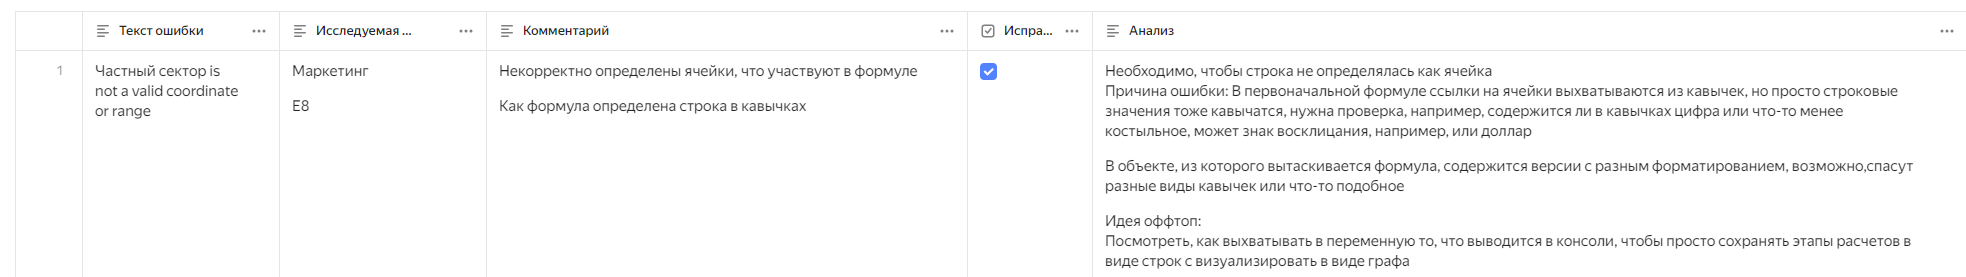

In [ ]:
"""
    Программа для исключения извлечения простых строк из выделенного списка ссылок на ячейки из-за кавычек
    Исключение строк не содержащих Листа со знаком восклицания или сочетания букв и цифр при помощи filter()
    Примечание: так как бывают ссылки без листов "С9", этот фикс не сработает, если попадется значение, например, 'Частный сектор2', так как оно имеет такую же структуру
    Технически можно ограничить следующим образом: строка воспринимается в качестве ссылки на ячейку только если перед цифрой одна или две буквы, но это тоже не абсолютное решение
"""

# Список строк с похожими элементами
list1 = ['Организационные!E110', 'Частный сектор', 'Организационные!E3', 'Нормативы_Маркетинг!A7:C46', 'Организационные!E3', 'Нормативы_Маркетинг!A7:C46']
list2 = ['Организационные!E110', 'Организационные!E3', 'Нормативы_Маркетинг!A7:C46', 'Организационные!E3', 'Нормативы_Маркетинг!A7:C46']


# функция, которая проверяет строки на вхождение
def filter_refs(string_to_check):
    if len(re.findall(r'\w+[!]*\w?\d+', string_to_check)) > 0: # len(re.findall(r'!', string_to_check)) > 0 or
        return True
    else:
        return False

# Применение filter() для удаления повторяющихся строк
ll = list2
out_filter = list(filter(filter_refs, list1))

print("Неотфильтрованный список:", list1)
print("Отфильтрованный список:", out_filter)
print("Сошлось ли:", out_filter == list2)

Неотфильтрованный список: ['Организационные!E110', 'Частный сектор', 'Организационные!E3', 'Нормативы_Маркетинг!A7:C46', 'Организационные!E3', 'Нормативы_Маркетинг!A7:C46']
Отфильтрованный список: ['Организационные!E110', 'Организационные!E3', 'Нормативы_Маркетинг!A7:C46', 'Организационные!E3', 'Нормативы_Маркетинг!A7:C46']
Сошлось ли: True


# **BAG FIX #3**
Неправильный ренейминг ячейки в имя диапазона + ТЕСТ

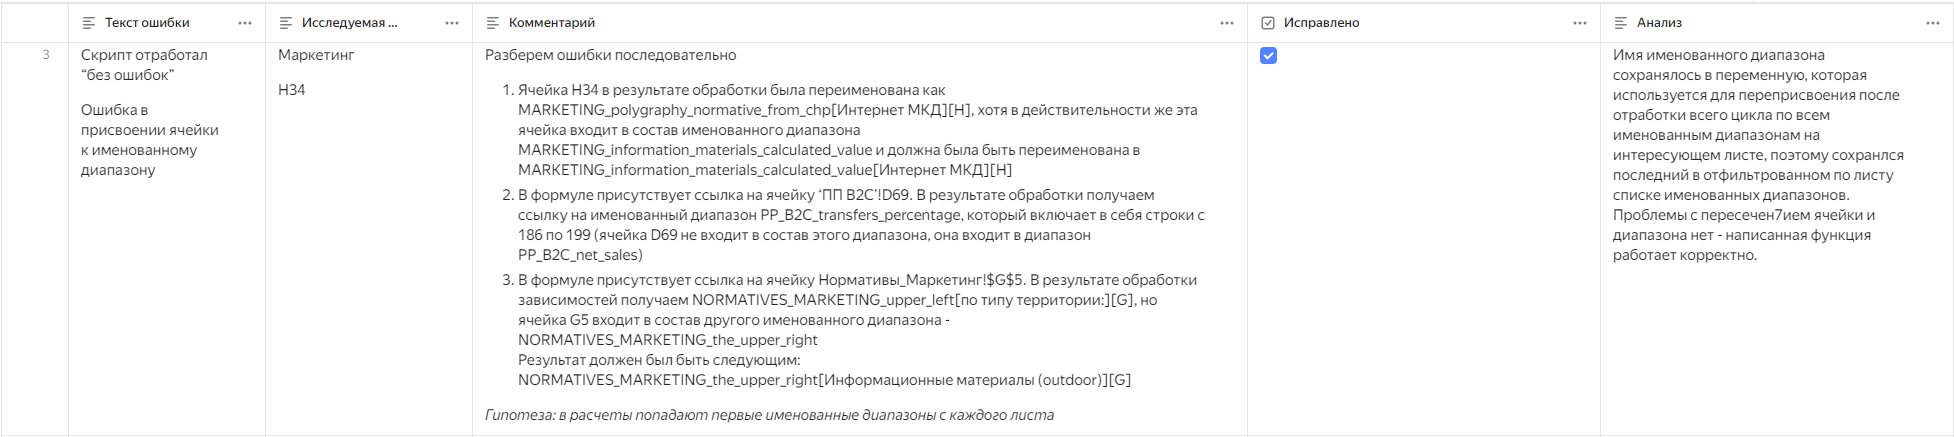

In [169]:
formula = rf'_C_("ПП B2C!D69")'
i = 'ПП B2C!D69'

sheet_name = pycel.AddressCell(i).sheet
cell_name = pycel.AddressCell(i).coordinate

filtered_defined_names = filter_defined_names_by_type_and_sheet(workbook.defined_names, sheet_name)

done = False
a = 0
for name, value in filtered_defined_names.items():
    if done == False:
        # print(f'{name} : {value}')
        ranges = workbook.defined_names[name].value  # 'АА_методология!$A$13:$DR$53'
        ranges_splited = ranges.split(',')
        for range in ranges_splited:
            min_col, min_row, max_col, max_row = openpyxl.utils.cell.range_boundaries(range.split('!')[1])
            result = is_cell_in_explicit_range(workbook, sheet_name, cell_name, min_row, max_row, min_col,
                                                max_col)
            if result:
                print(f"\nЯчейка {sheet_name}!{cell_name} находится в диапазоне: {range}.")
                print(f'Таблица: {name}')
                done = True
                dependent_tables[i] = f'{name}'
                cell_name_new_i = f'{name}'
                break
        if len(ranges_splited) > 1:
            for range_temp in ranges_splited:
                if a == 0:
                    min_col_temp, min_row_temp, max_col_temp, max_row_temp = openpyxl.utils.cell.range_boundaries(range_temp.split('!')[1])
                else:
                    min_col_tempp, min_row_tempp, max_col_tempp, max_row_tempp = openpyxl.utils.cell.range_boundaries(
                        range_temp.split('!')[1])
                    if min_col_tempp < min_col_temp:
                        min_col_temp = min_col_tempp
                a += 1
            start_range_column_i = openpyxl.utils.cell.get_column_letter(min_col_temp)
        else:
            # start_range_column_i = pycel.AddressRange(range.split('!')[1]).start.column
            start_range_column_i = pycel.AddressRange(ranges.split(',')[0].split('!')[1]).start.column

old_cell_column_i = pycel.AddressCell(cell_name).column
old_cell_row_i = pycel.AddressCell(cell_name).row

old_cell_row_i = excel.evaluate(f'{sheet_name}!{start_range_column_i}{old_cell_row_i}')
excel.evaluate(f'{sheet_name_to_write}!{pycel.AddressCell(cell_name_to_write).column}{pycel.AddressCell(cell_name_to_write).row}')

replace_cell_name = f'{cell_name_new_i}[{old_cell_row_i}][{old_cell_column_i}]'

formula = re.sub(rf'{sheet_name}!{cell_name}', replace_cell_name, formula)

print("\nРедуцирую локальные функции pycel из формулы...")
compiled_code = remove_patterns(formula)

print(f"\n\nPython code | UPD version:\n {compiled_code}\n\n")



Ячейка ПП B2C!D69 находится в диапазоне: 'ПП B2C'!$D$66:$DS$80.
Таблица: PP_B2C_net_sales

Редуцирую локальные функции pycel из формулы...


Python code | UPD version:
 PP_B2C_net_sales[Интернет МКД][D]




# **BAG FIX #10**
Настройка форматирования аутпута

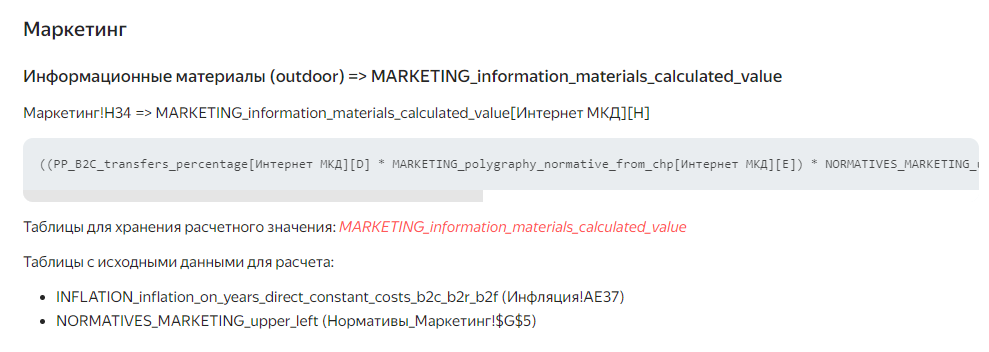

In [177]:
def write_to_file(cell_name, sheet_name, compiled_code, table, dependent_tables, upd_name, filename='/content/output.txt'):
    with open(filename, 'a+') as file:
        # Write sheet_name in H2 style
        file.write(f'### {sheet_name}\n\n')
        file.write(f'#### {old_cell_row} =\> {table}\n\n')

        # Write cell_name in H1 style
        file.write(f'{sheet_name_to_write}!{pycel.AddressCell(cell_name_to_write).column}{pycel.AddressCell(cell_name_to_write).row} =\>  {upd_name}\n\n')

        # Write compiled_code in code block style
        # compiled_code_markdown = markdown.markdown(compiled_code, extensions=['codehilite'])
        file.write(f'```\n{compiled_code}\n```')

        # Write table name
        file.write(f'\n\nТаблицы для хранения расчетного значения: *{{red}}({table})*\n\n')

        dep_tables_formatted = [f'* {value} ({key})\n' for key,value in dependent_tables.items()]
        # Write connected tables names
        file.write(f'Таблицы с исходными данными для расчета:\n\n{"".join(dep_tables_formatted)}\n\n')

In [182]:
dep_tables_temp = [f'* {value} ({key})\n' for key,value in dependent_tables.items()]
print("".join(dep_tables_temp))

* MARKETING_polygraphy_normative_from_chp (Маркетинг!L8)
* MARKETING_polygraphy_normative_from_chp (Маркетинг!L9)
* MARKETING_polygraphy_normative_from_chp (Маркетинг!L10)



# **Архивная версия переприсвоения для строк**

In [ ]:
            # ПЕРЕПРИСВОЕНИЕ для строк
            # Для переприсвоения строки на продукт необходимо вытащить по name именованный диапазон
            # У него найти первый столбец
            # a = 0
            # if len(workbook.defined_names[name].value.split(',')) > 1:
            #     for range_temp in workbook.defined_names[name].value.split(','):
            #         if a == 0:
            #             min_col_temp, min_row_temp, max_col_temp, max_row_temp = openpyxl.utils.cell.range_boundaries(range_temp.split('!')[1])
            #         else:
            #             min_col_tempp, min_row_tempp, max_col_tempp, max_row_tempp = openpyxl.utils.cell.range_boundaries(
            #                 range_temp.split('!')[1])
            #             if min_col_tempp < min_col_temp:
            #                 min_col_temp = min_col_tempp
            #         a += 1
            #     start_range_column_i = openpyxl.utils.cell.get_column_letter(min_col_temp)
            # else:
            #     # start_range_column_i = pycel.AddressRange(range.split('!')[1]).start.column
            #     start_range_column_i = pycel.AddressRange(workbook.defined_names[name].value).start.column

            # И из него вытащить элемент по old_cell_row и подставить вместо old_cell_row
            # start_range_column_i = openpyxl.utils.cell.get_column_letter(min_col_temp)